In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Convert labels to integers
X = np.array(X).astype(np.float32)
X = X/255.0
y = np.array(y).astype(np.uint8).reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
print(y_one_hot.shape)
print(X.shape)

(70000, 10)
(70000, 784)


In [4]:
# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.4, random_state=42)

# Split the temporary set equally into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Epoch 1/10 - loss: 0.5165 - val_loss: 0.3632
Epoch 2/10 - loss: 0.3014 - val_loss: 0.2415
Epoch 3/10 - loss: 0.1987 - val_loss: 0.1674
Epoch 4/10 - loss: 0.1442 - val_loss: 0.1285
Epoch 5/10 - loss: 0.1138 - val_loss: 0.1047
Epoch 6/10 - loss: 0.0944 - val_loss: 0.0889
Epoch 7/10 - loss: 0.0816 - val_loss: 0.0785
Epoch 8/10 - loss: 0.0728 - val_loss: 0.0712
Epoch 9/10 - loss: 0.0664 - val_loss: 0.0657
Epoch 10/10 - loss: 0.0615 - val_loss: 0.0614


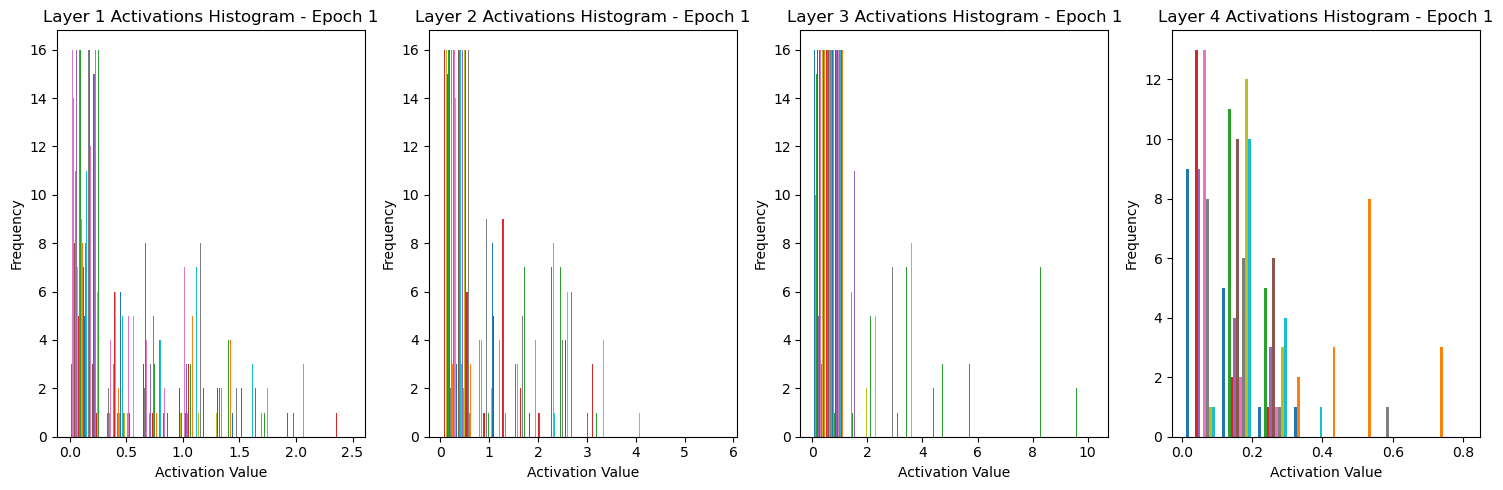

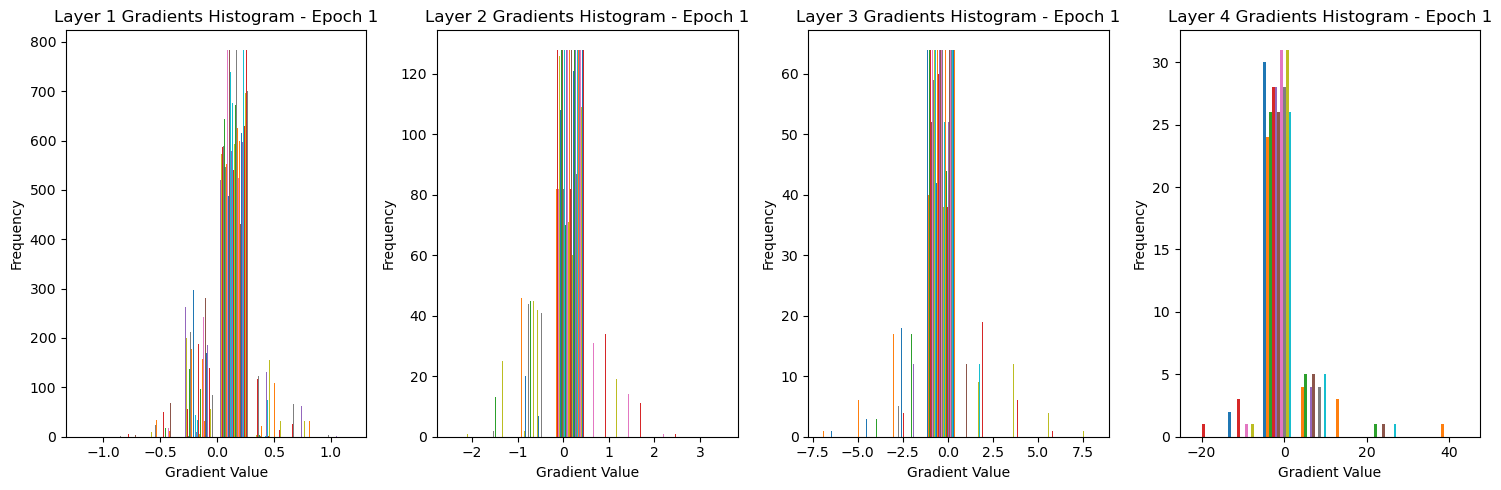

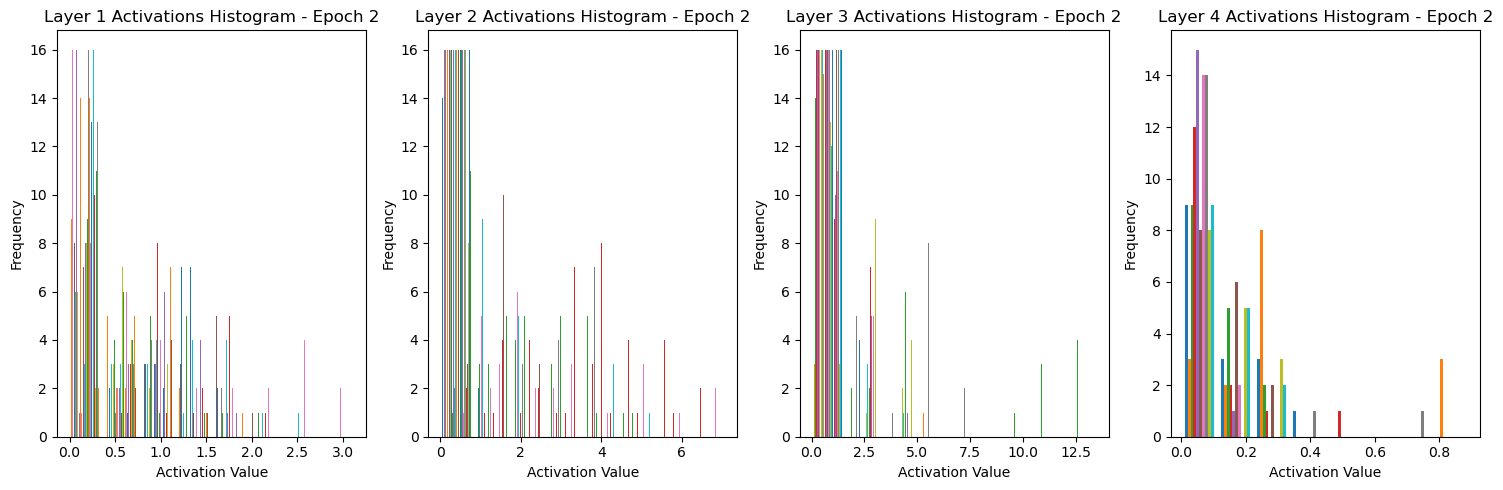

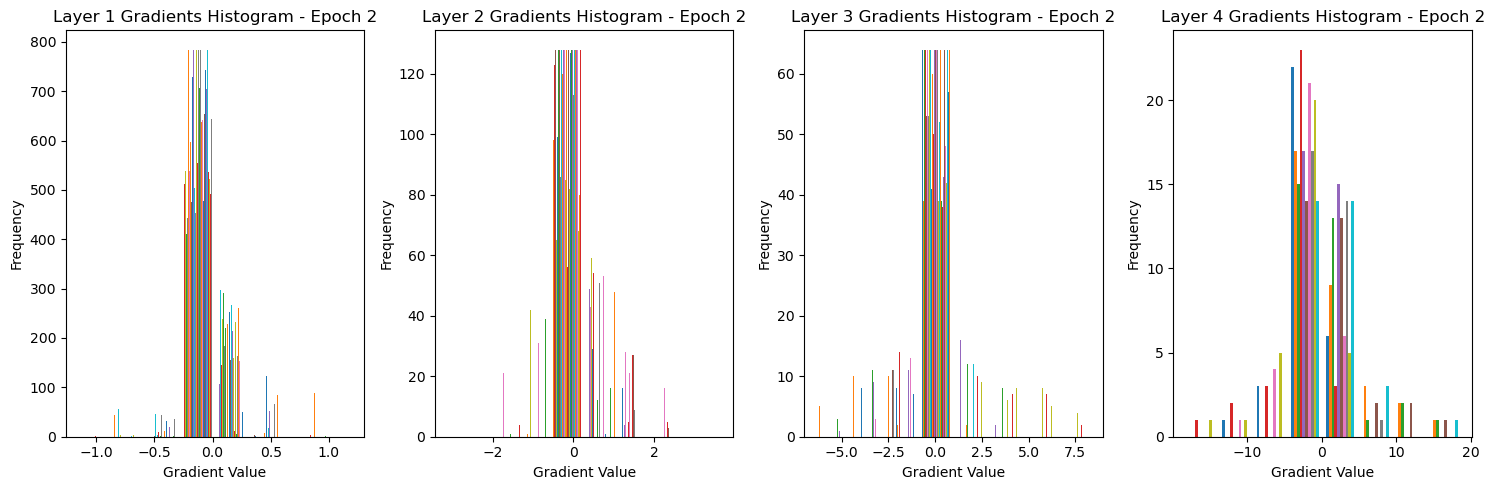

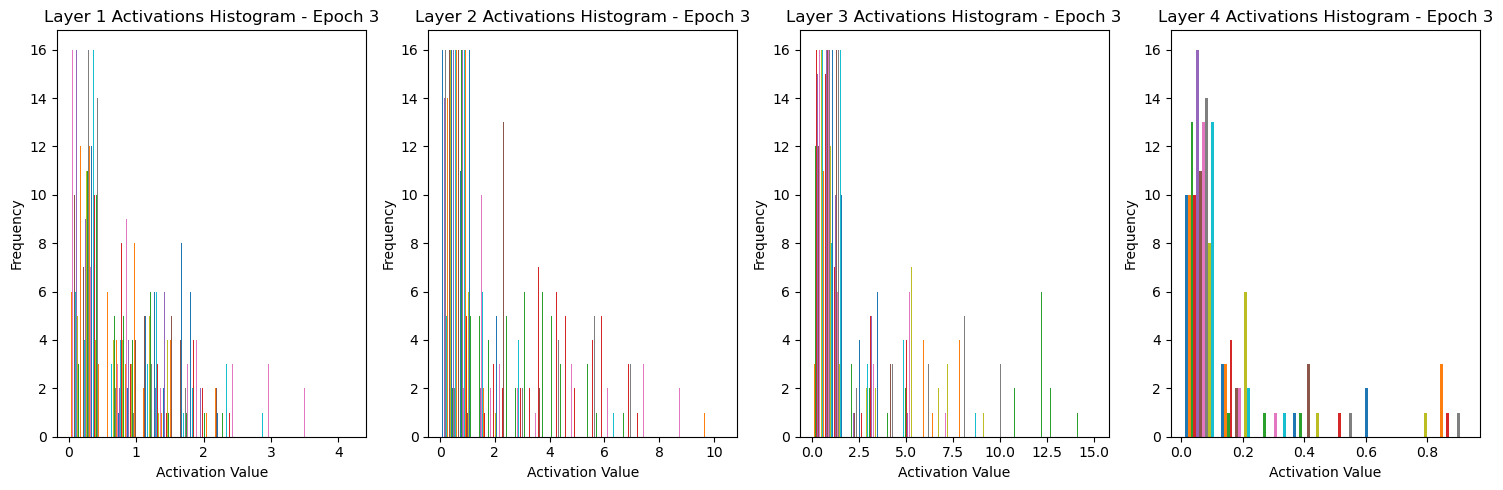

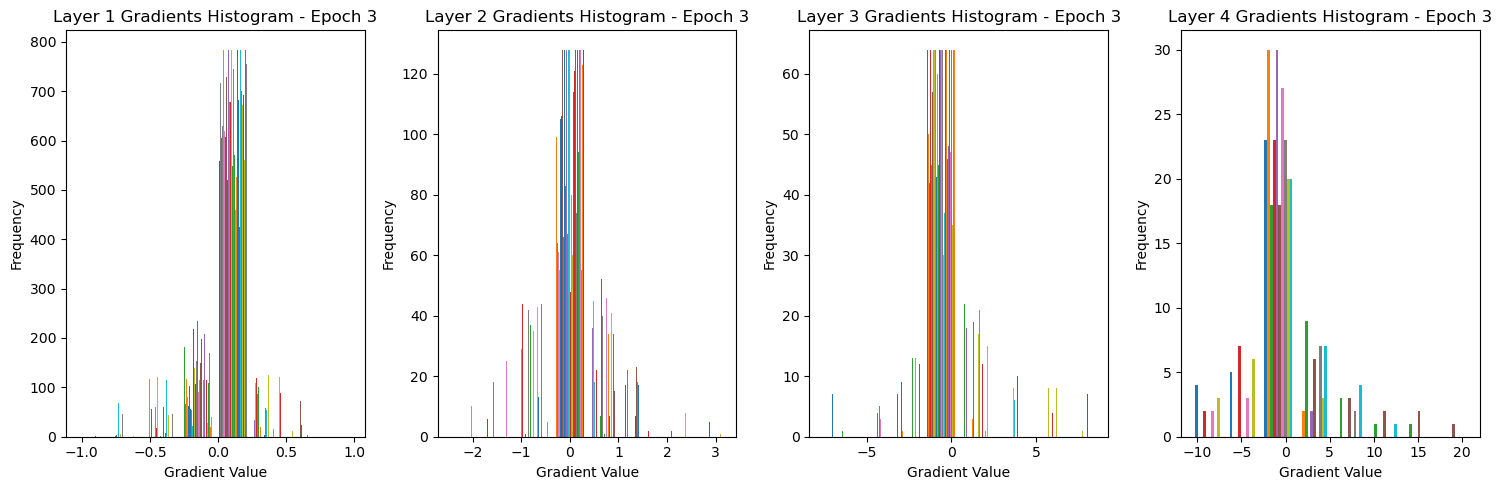

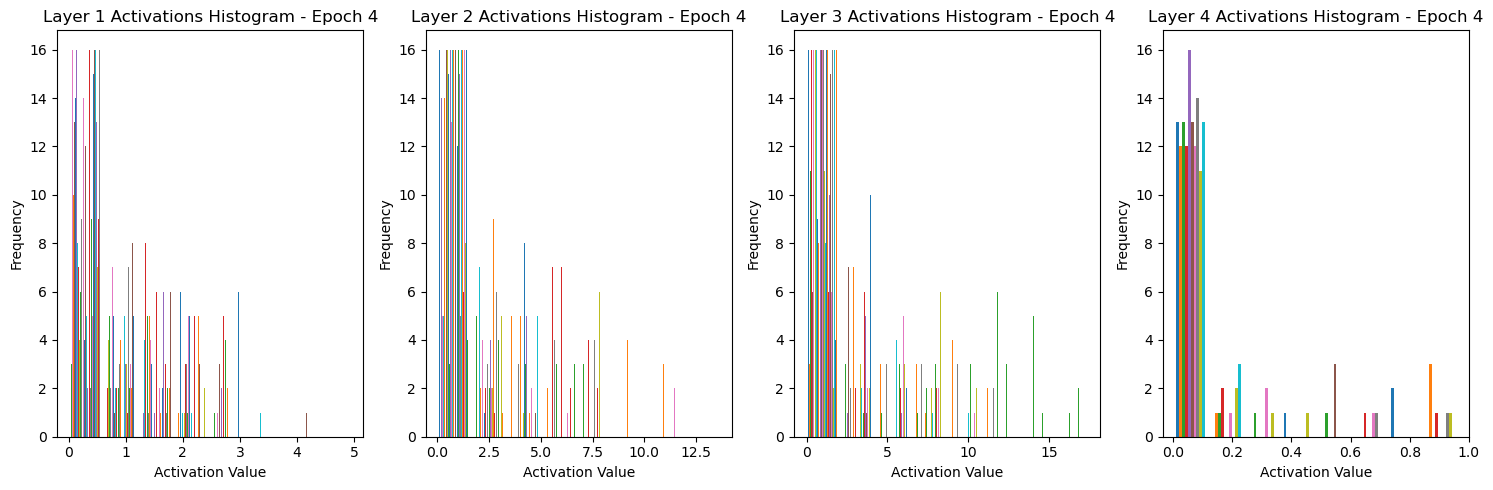

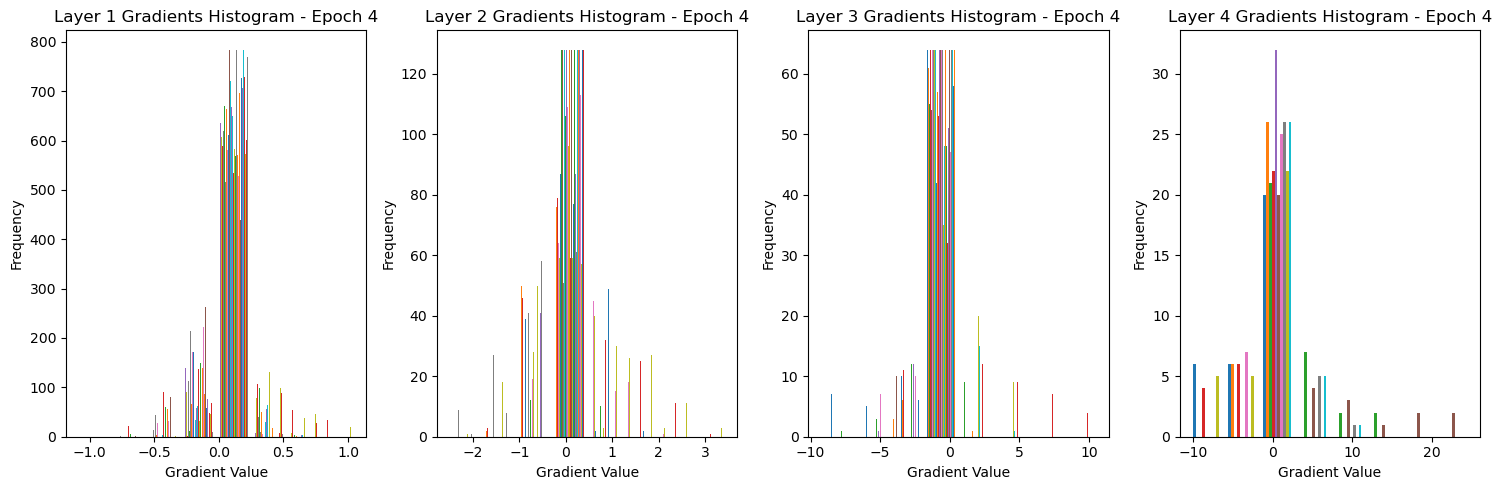

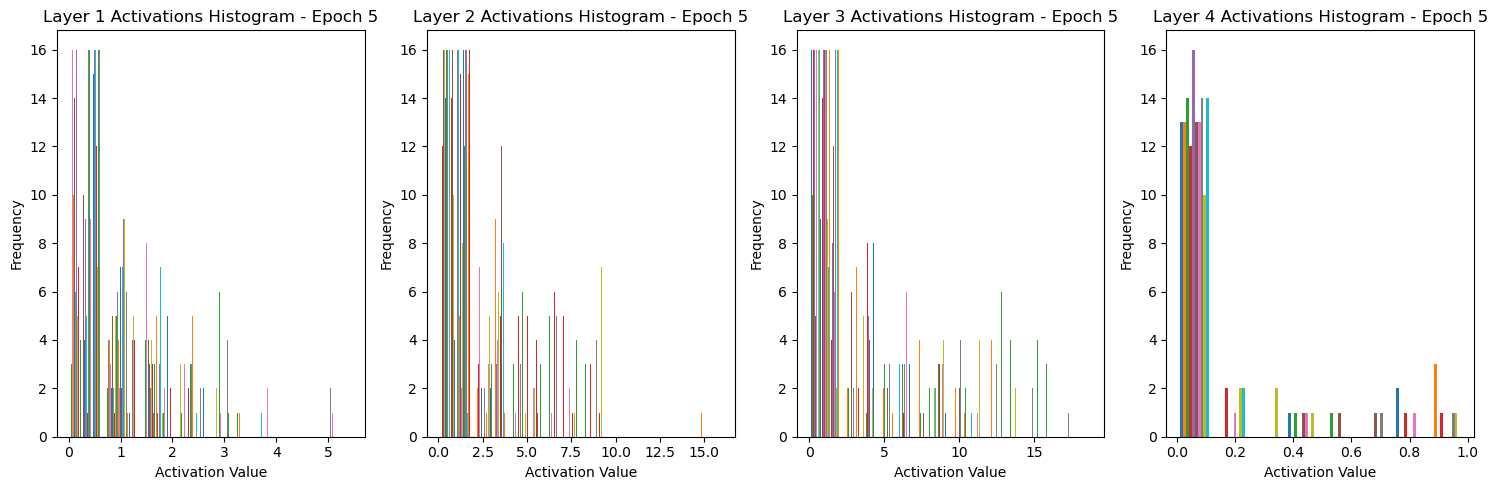

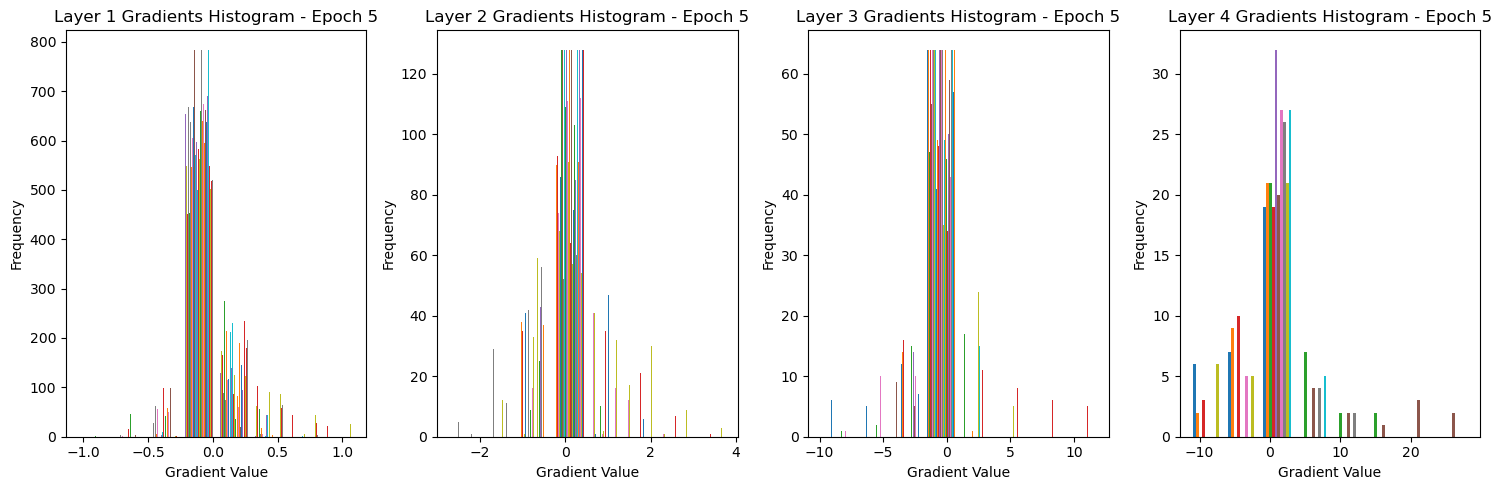

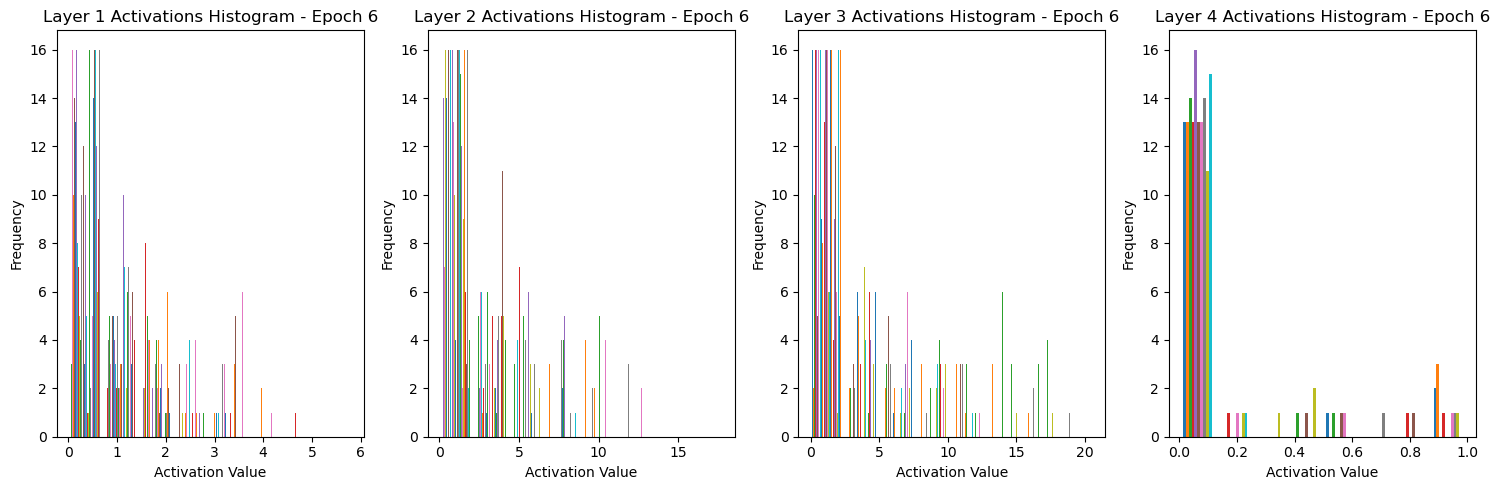

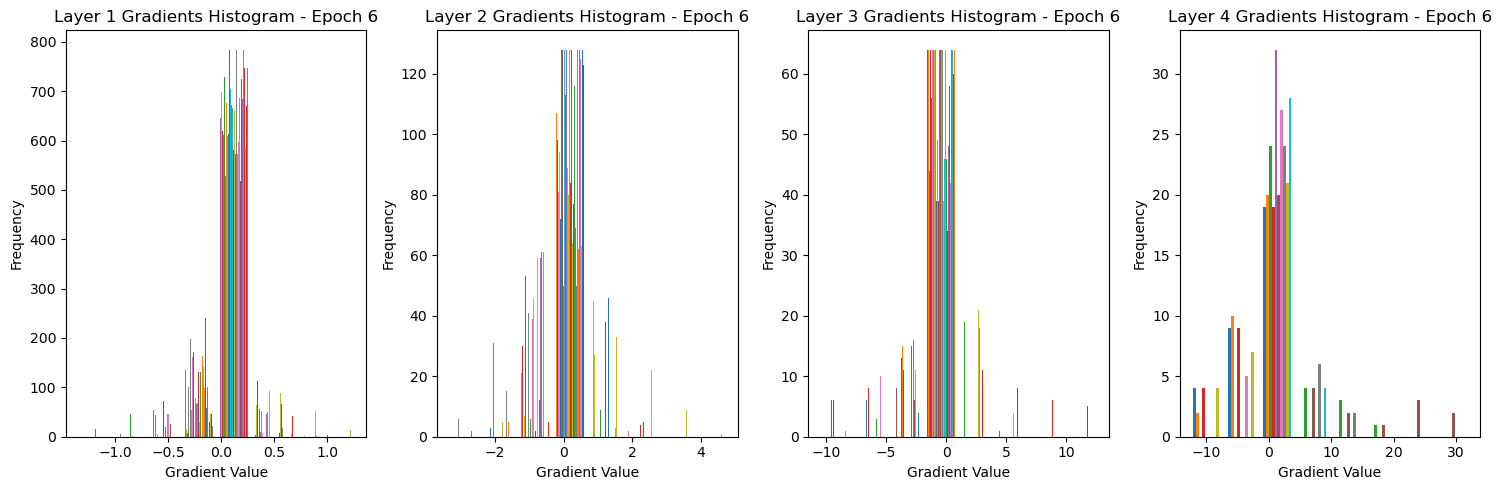

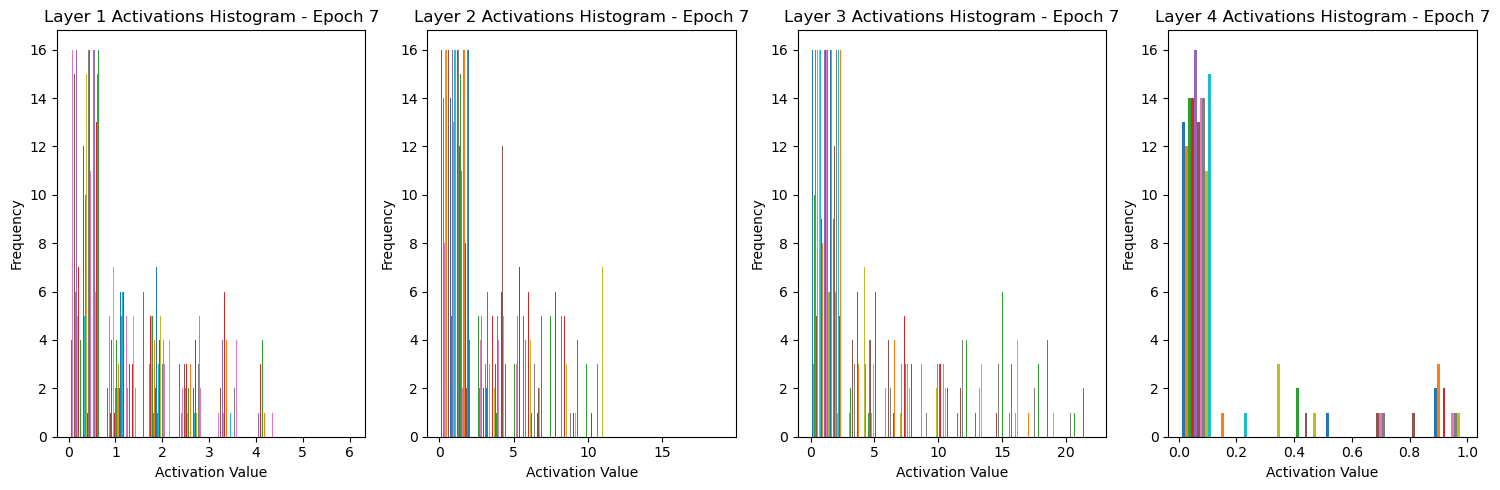

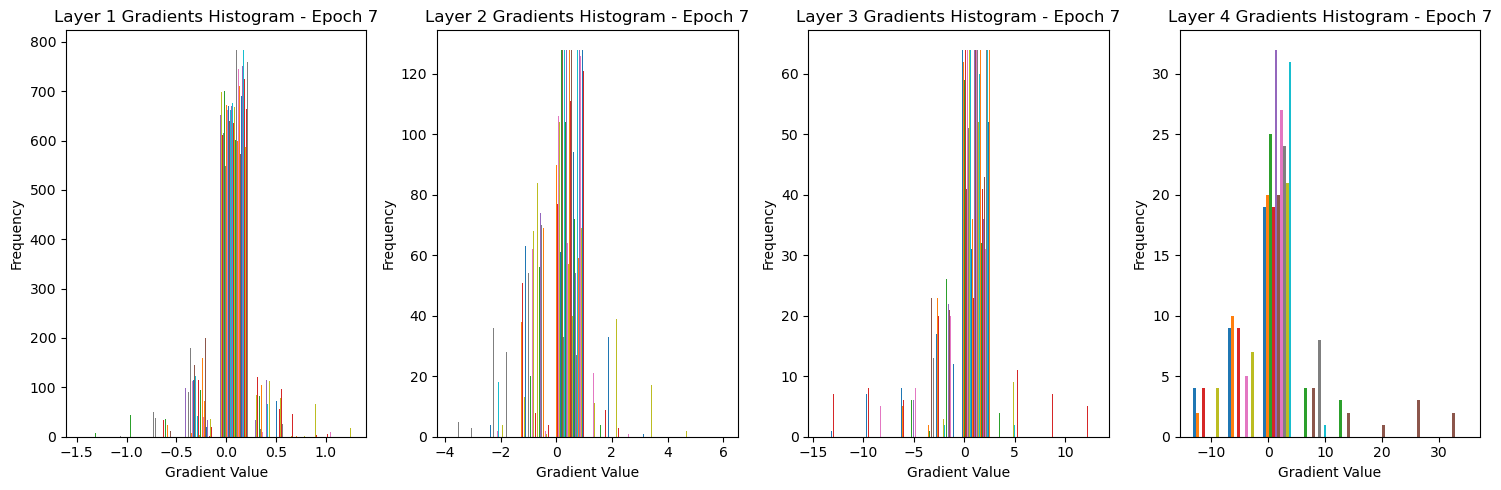

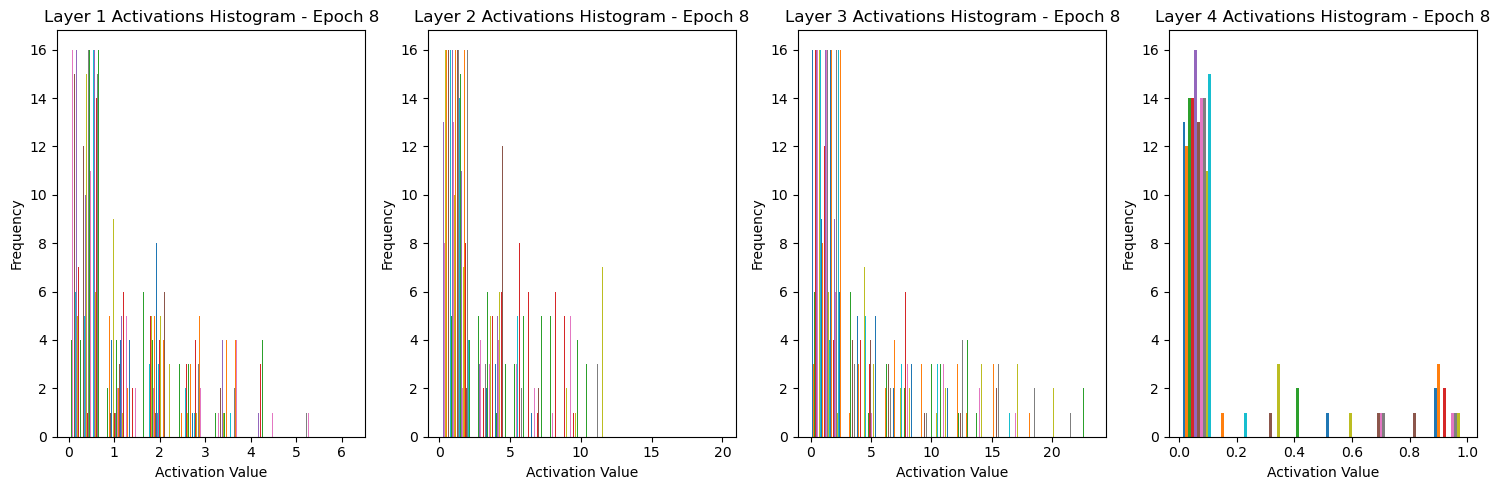

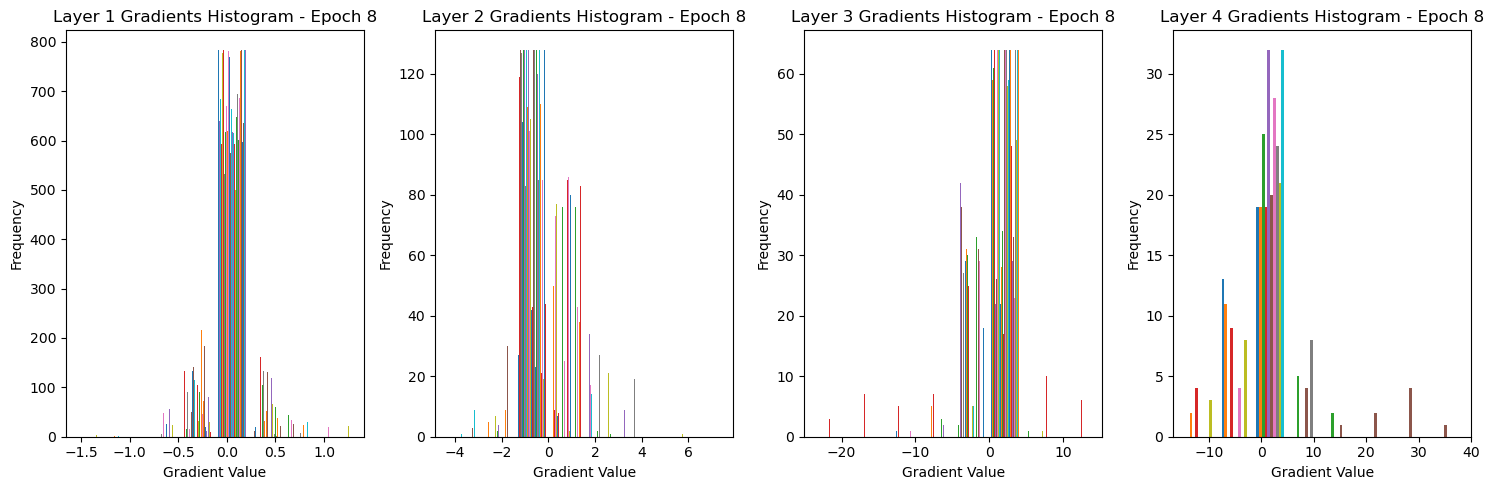

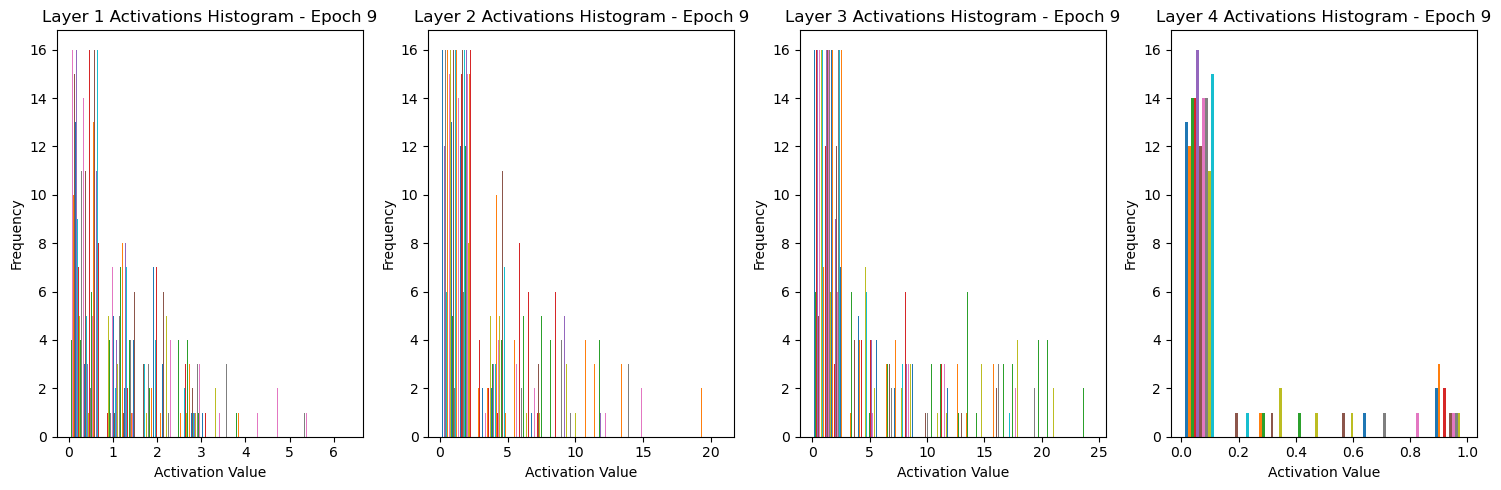

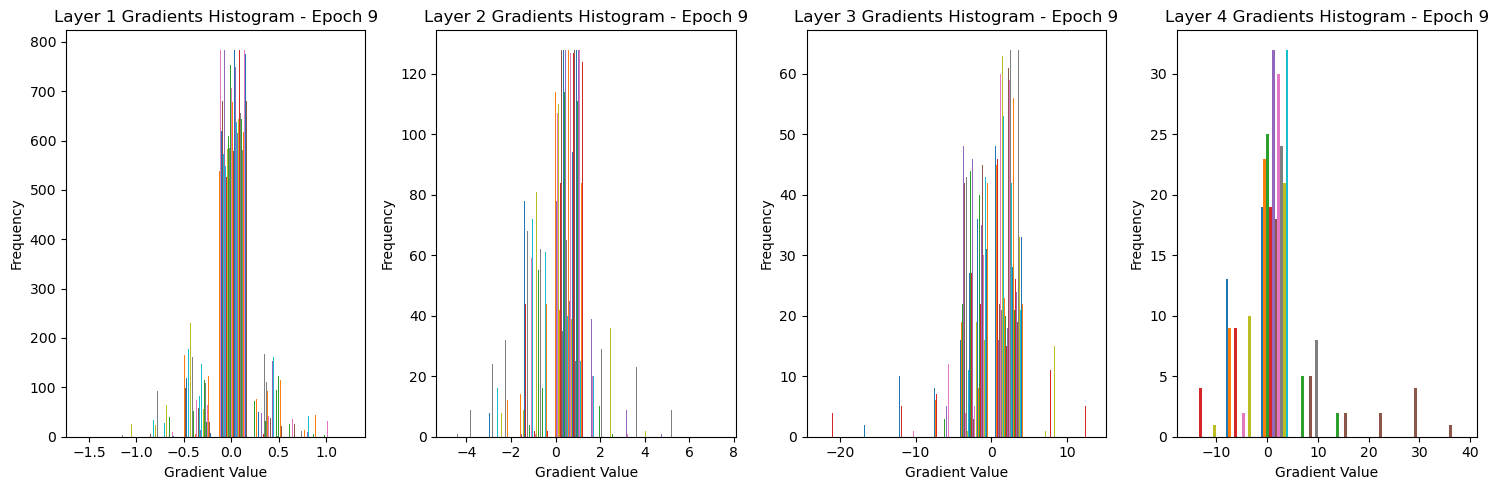

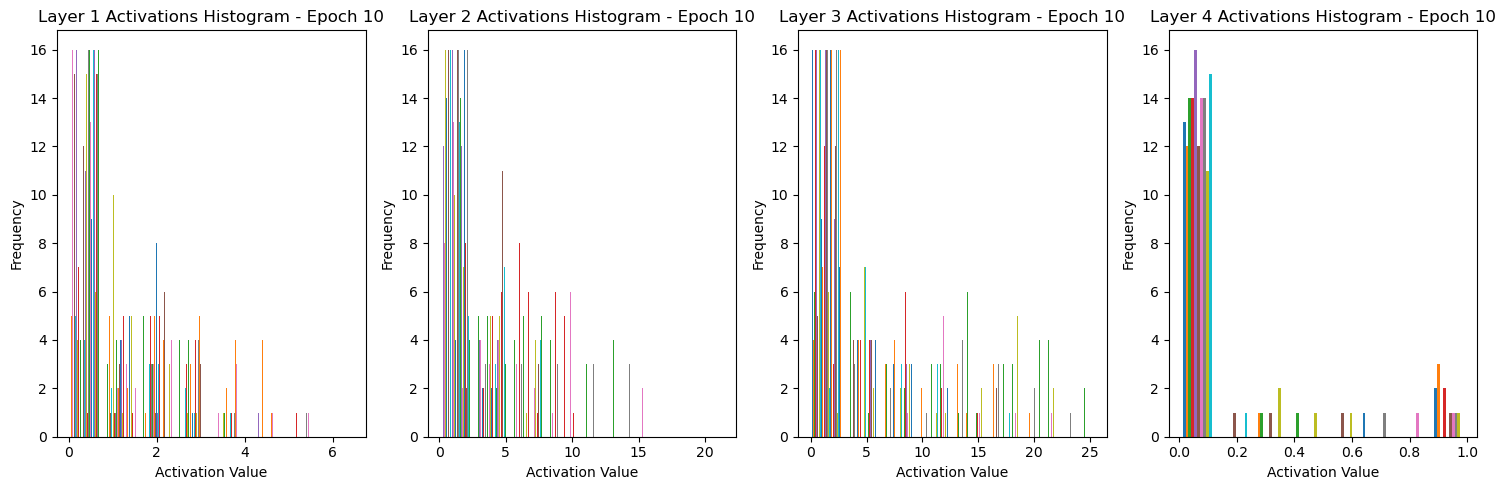

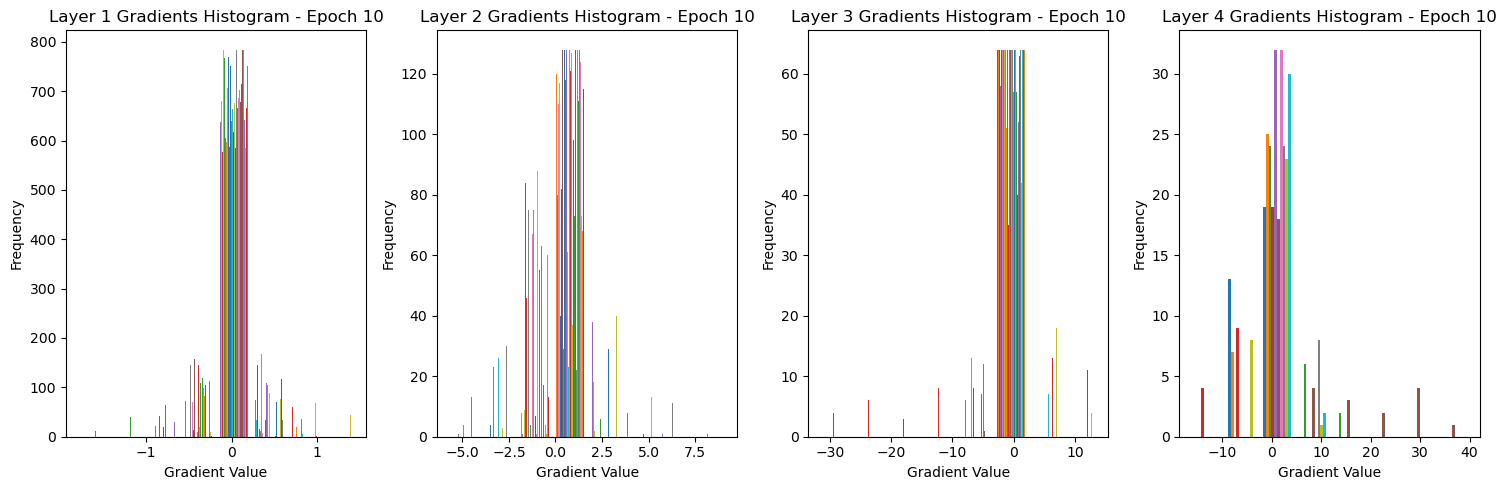

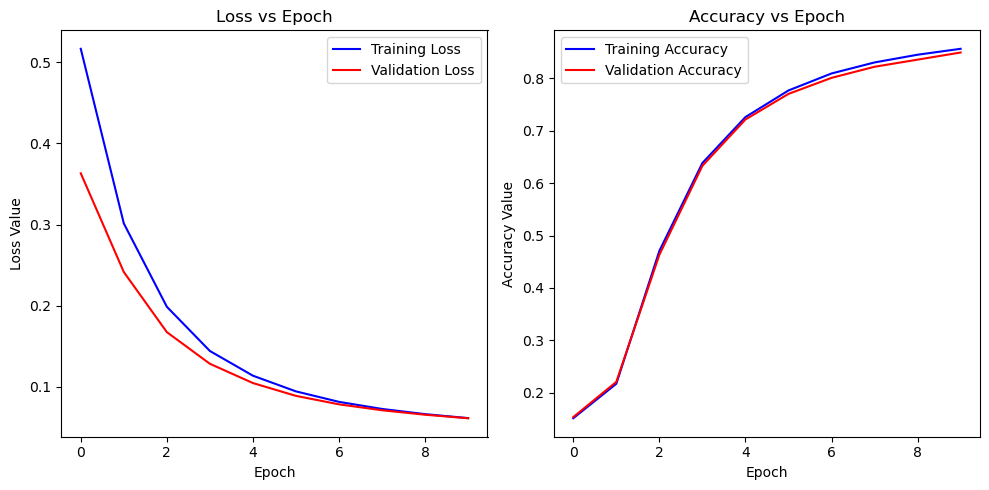

In [5]:
from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=LeakyReLu()))
model.add(Dense(n_units= 64, input_dim=128, activation=LeakyReLu()))
model.add(Dense(n_units= 32, input_dim=64, activation=LeakyReLu()))
model.add(Dense(n_units = 10, input_dim = 32, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001),
              loss=BinaryCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train, epochs=10, batch_size=512, X_val=X_test, y_val=y_test, verbose=True)


In [6]:
model.export_net('models/mnist_model.joblib')

In [7]:
from nnlib.models.sequential import SequentialModel
model = SequentialModel.import_net('models/mnist_model.joblib')

In [8]:
predictions = model.predict(X_val)


In [9]:
pred_numbers=[]
for i in predictions:
    # print(i)
    pred_numbers.append(np.argmax(i))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), pred_numbers))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1419
           1       0.96      0.98      0.97      1607
           2       0.90      0.90      0.90      1403
           3       0.91      0.88      0.90      1437
           4       0.92      0.93      0.93      1326
           5       0.90      0.86      0.88      1249
           6       0.94      0.94      0.94      1351
           7       0.93      0.92      0.92      1488
           8       0.88      0.88      0.88      1319
           9       0.89      0.91      0.90      1401

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [11]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Split the data into training (60%) and temporary (40%) sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test_onehot, test_size=0.5, random_state=42)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
y_train.shape

(60000,)

Epoch 1/10 - loss: 0.4432 - val_loss: 0.2624
Epoch 2/10 - loss: 0.2112 - val_loss: 0.1714
Epoch 3/10 - loss: 0.1495 - val_loss: 0.1341
Epoch 4/10 - loss: 0.1225 - val_loss: 0.1165
Epoch 5/10 - loss: 0.1085 - val_loss: 0.1070
Epoch 6/10 - loss: 0.1006 - val_loss: 0.1015
Epoch 7/10 - loss: 0.0955 - val_loss: 0.0977
Epoch 8/10 - loss: 0.0917 - val_loss: 0.0947
Epoch 9/10 - loss: 0.0888 - val_loss: 0.0924
Epoch 10/10 - loss: 0.0865 - val_loss: 0.0906


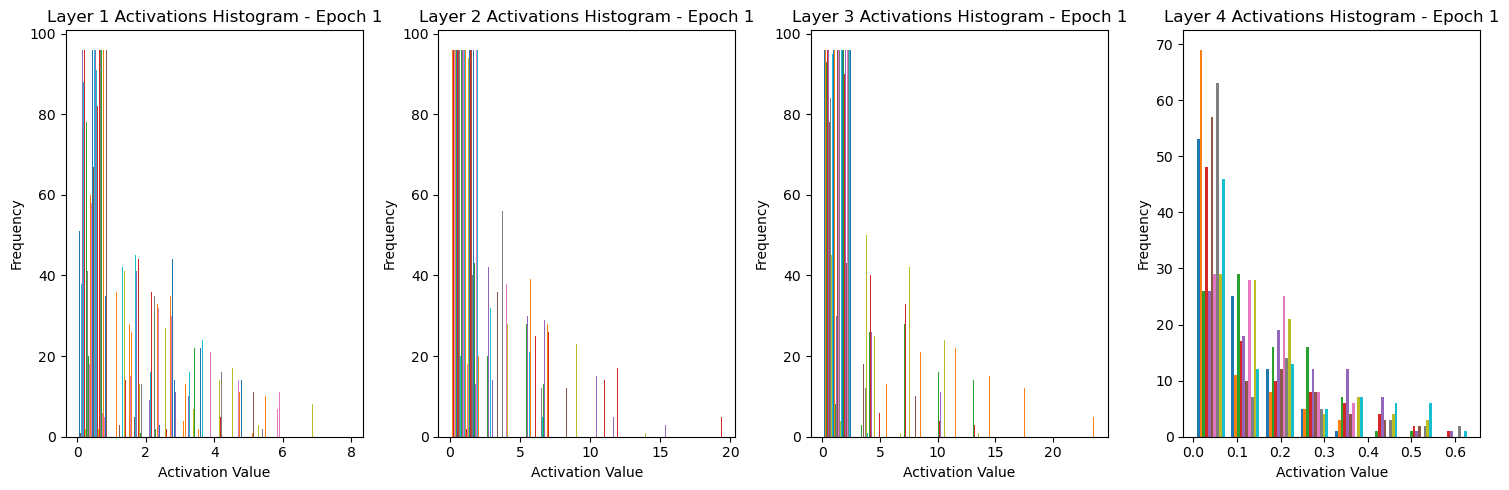

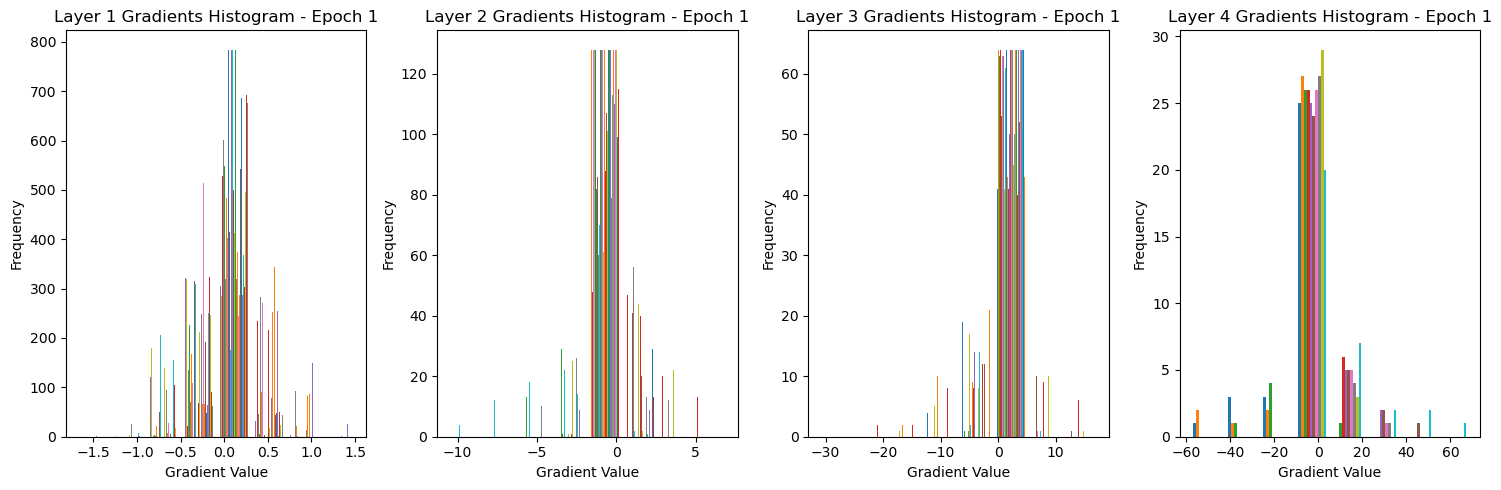

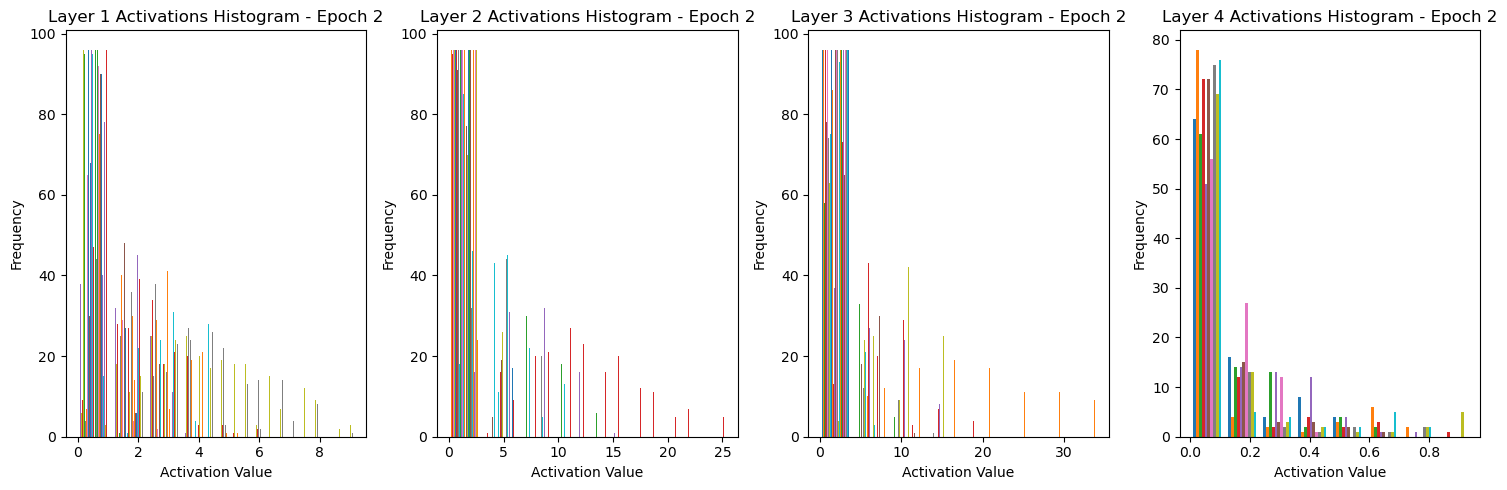

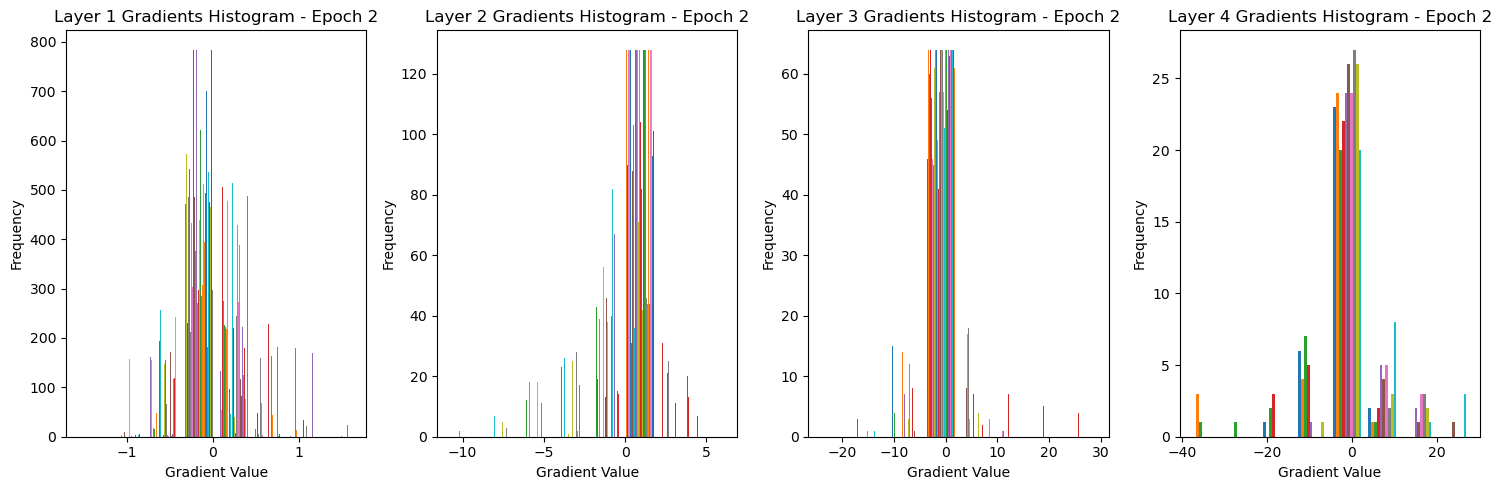

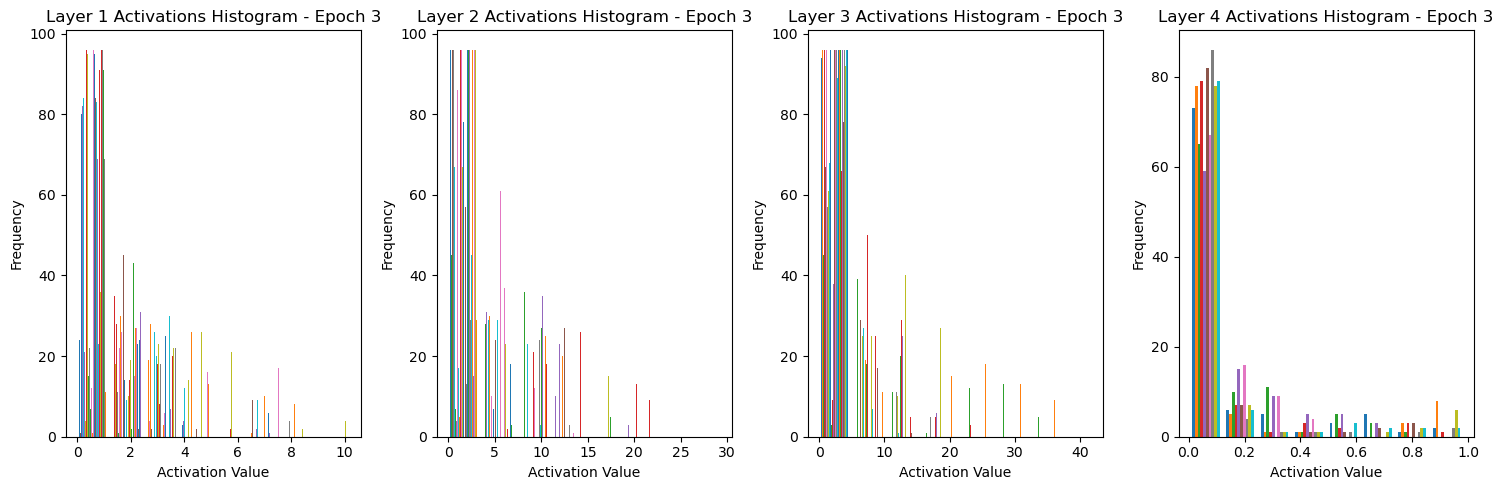

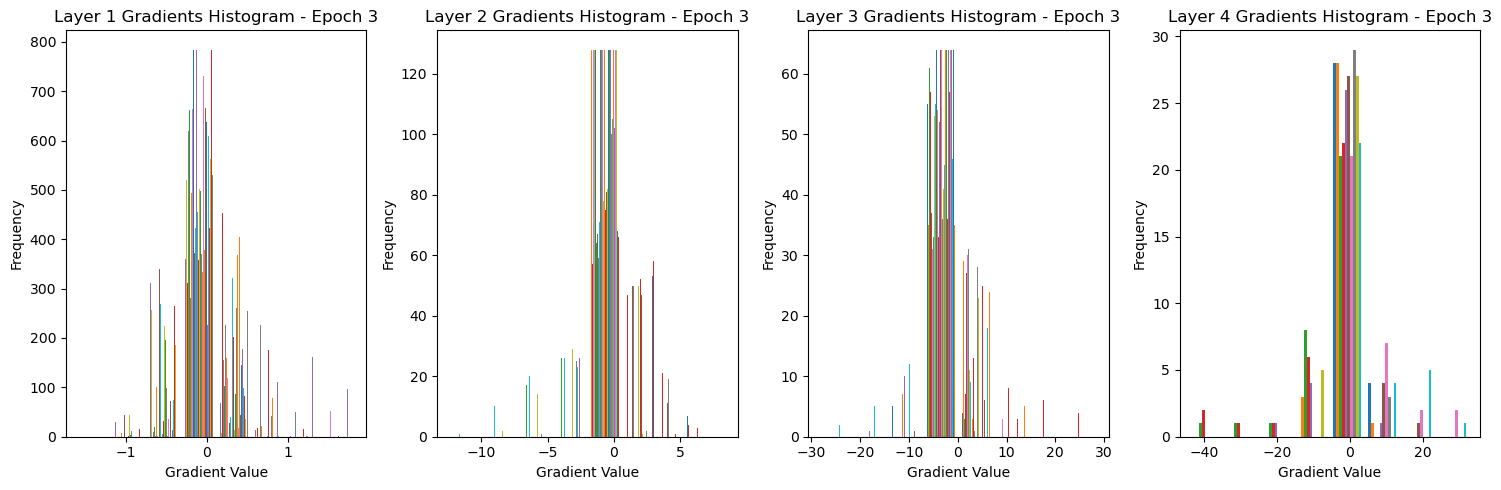

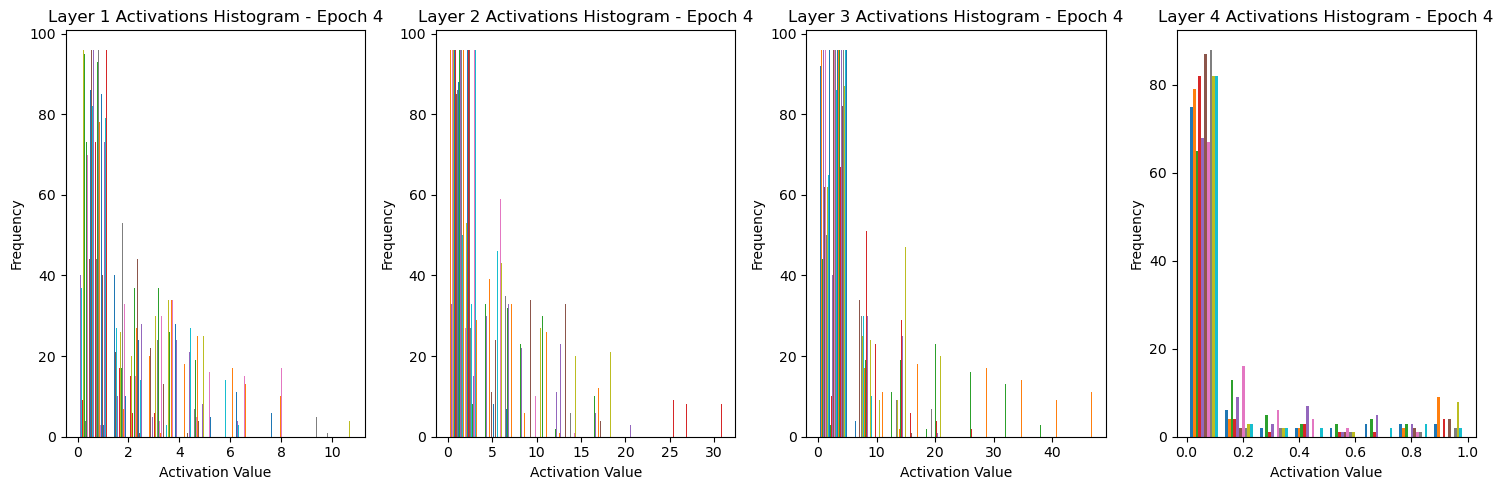

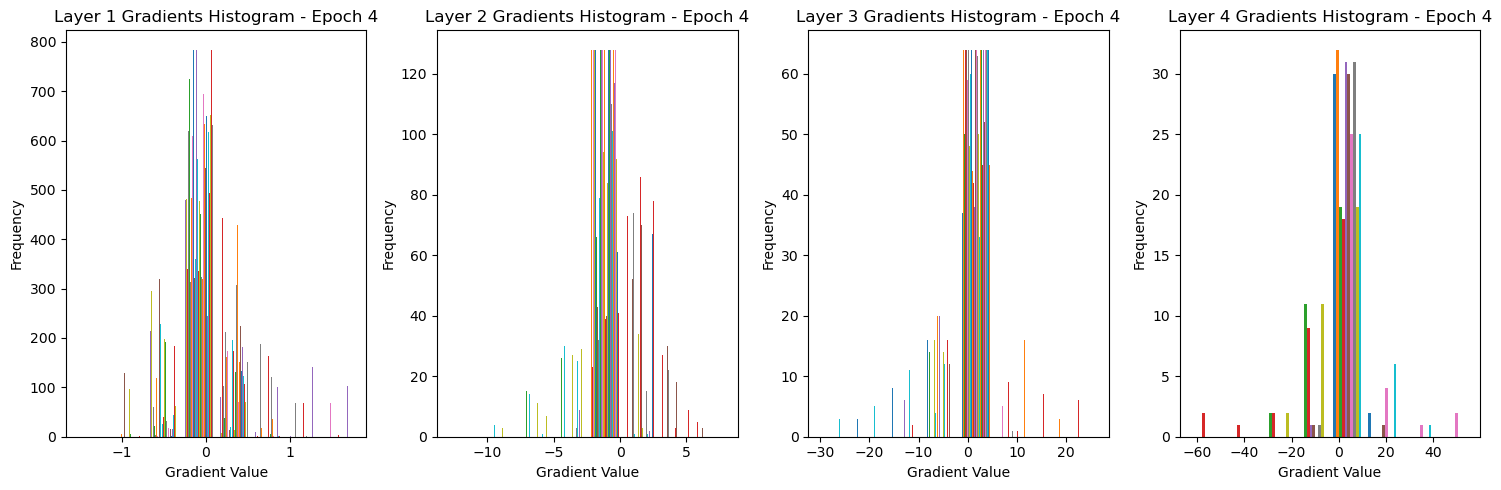

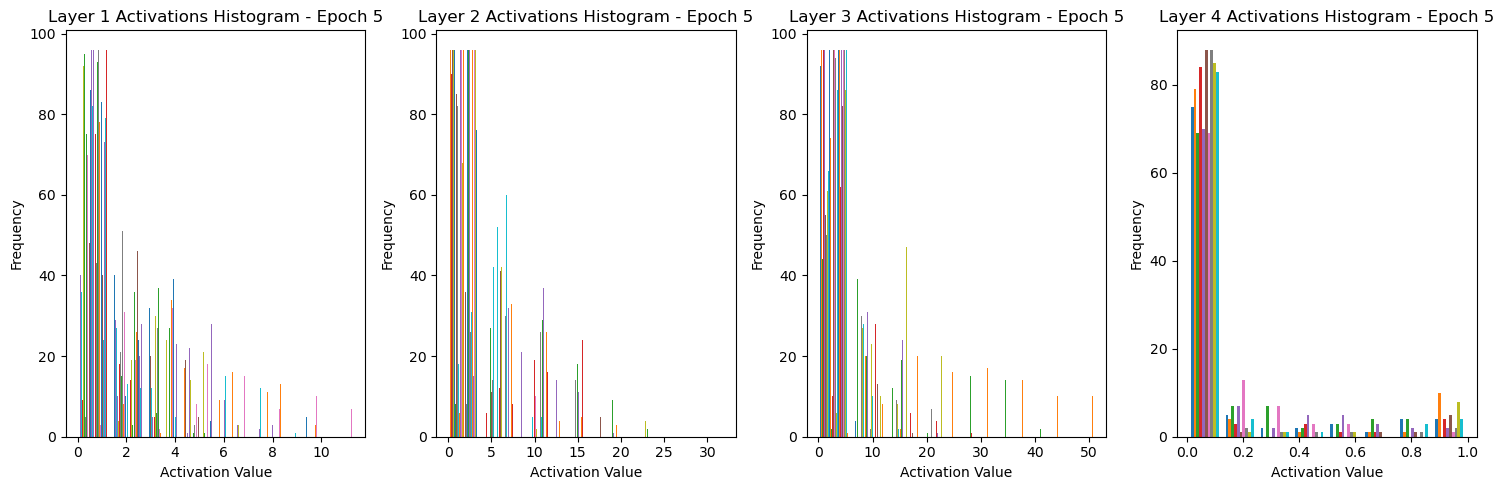

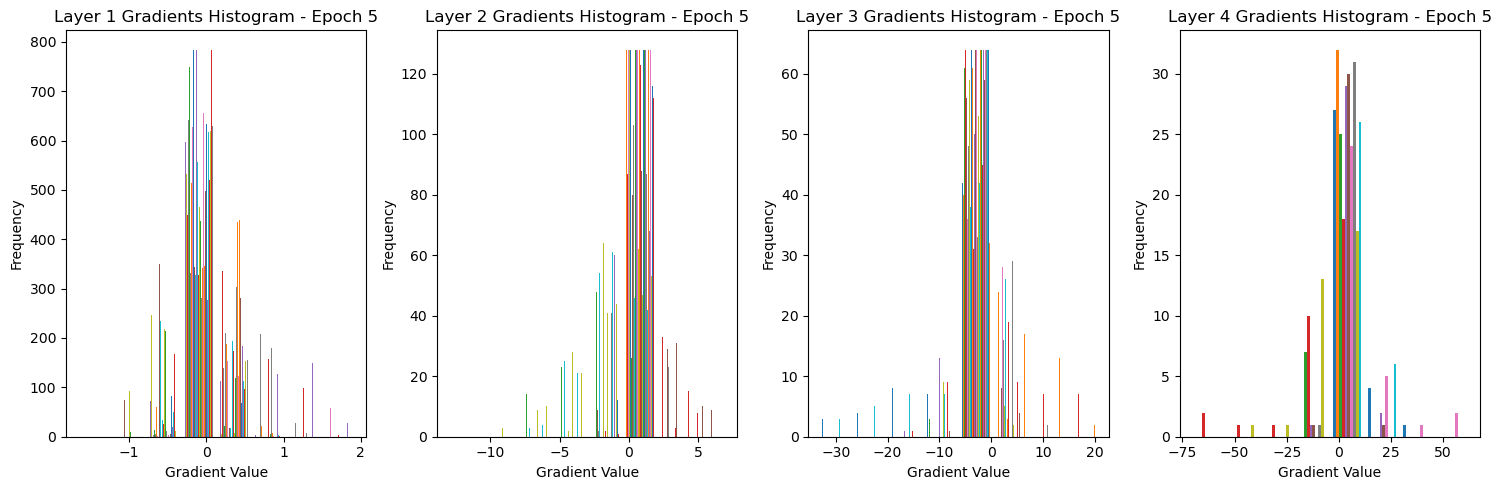

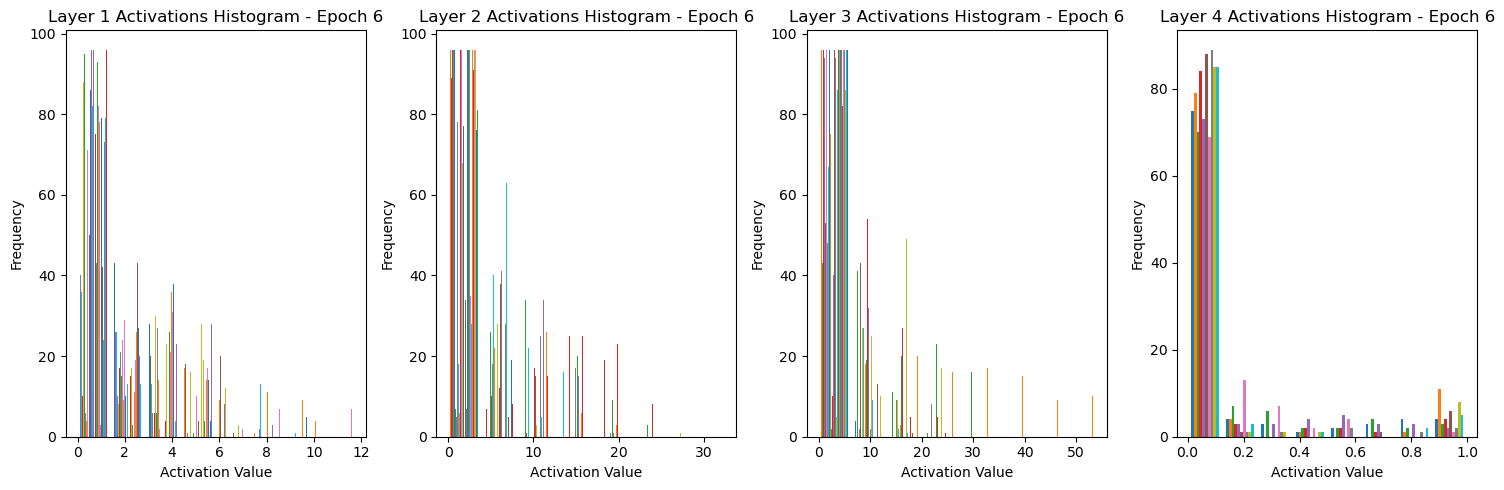

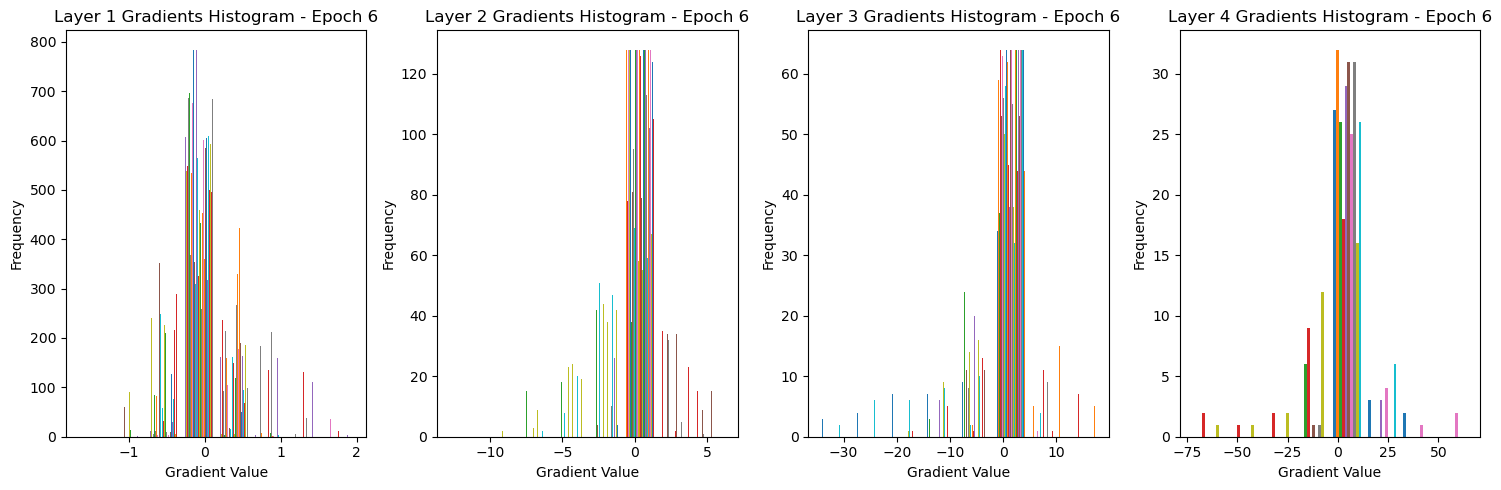

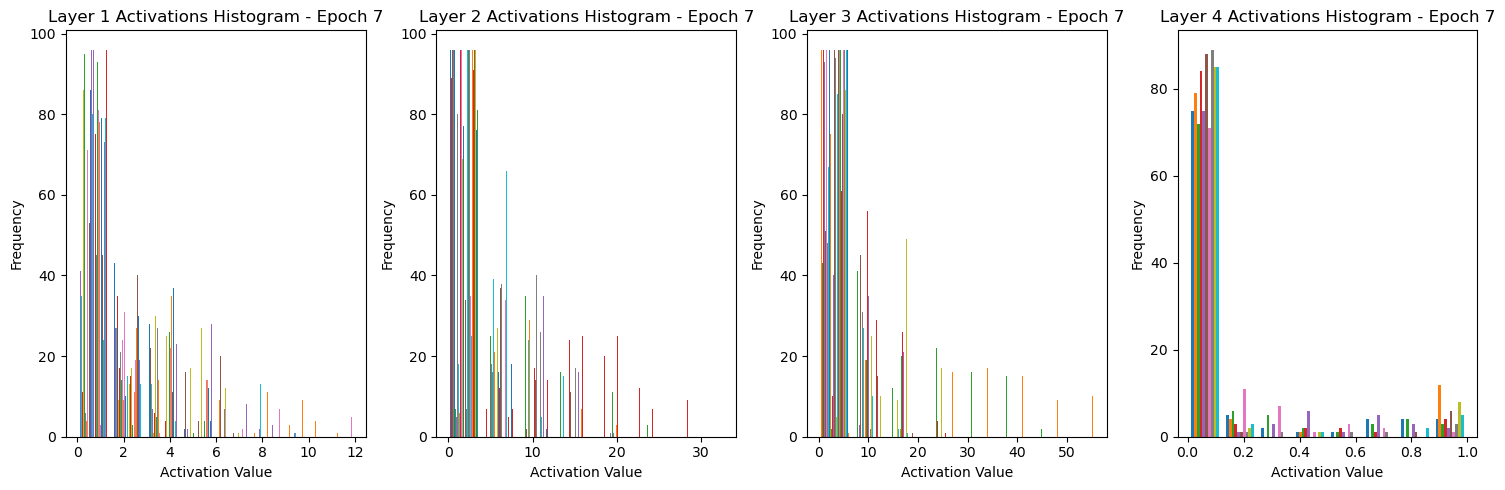

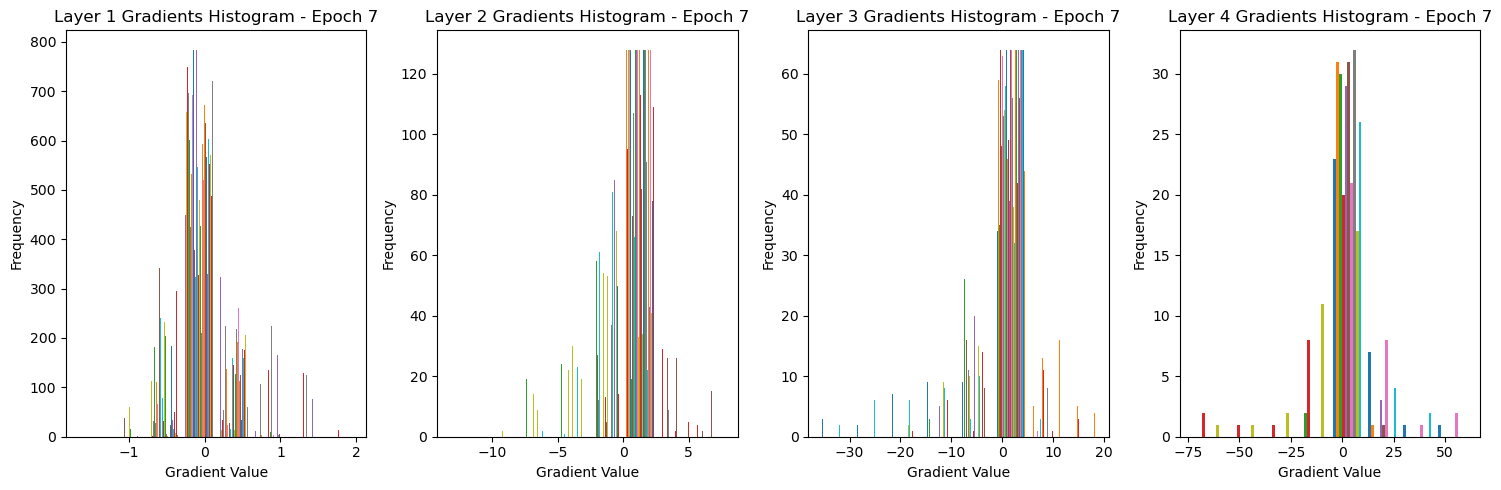

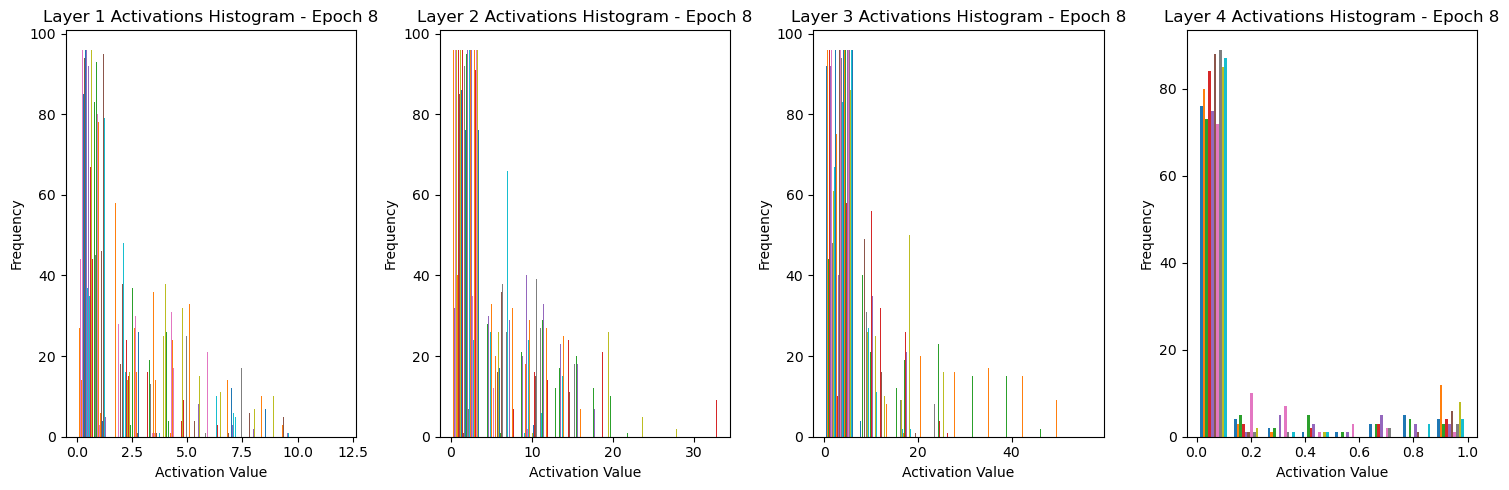

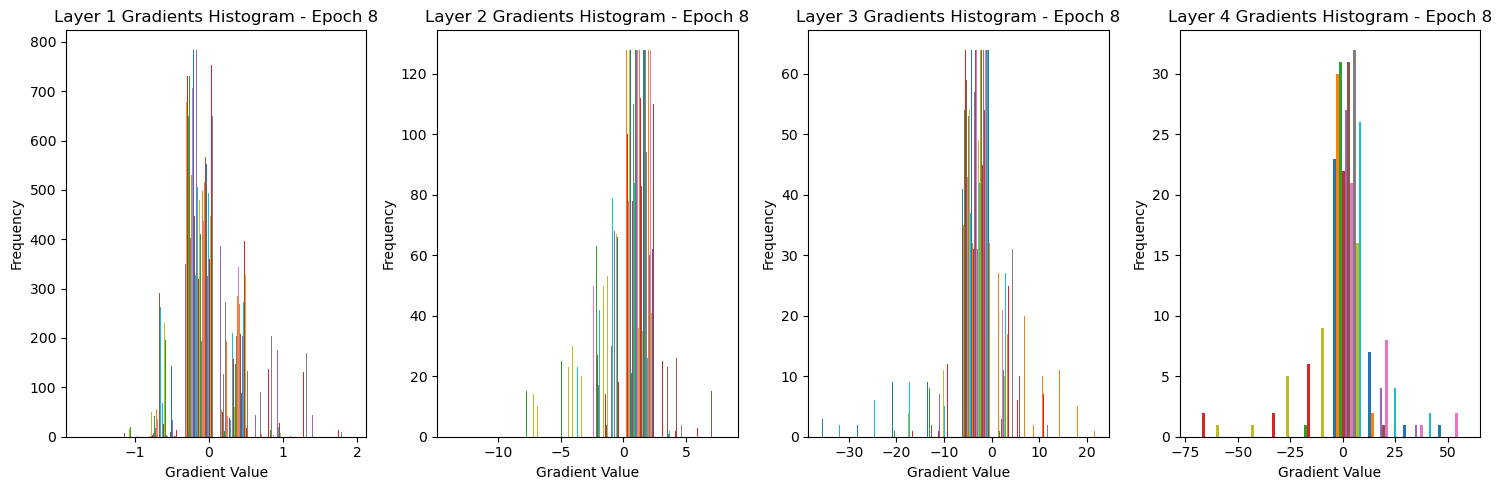

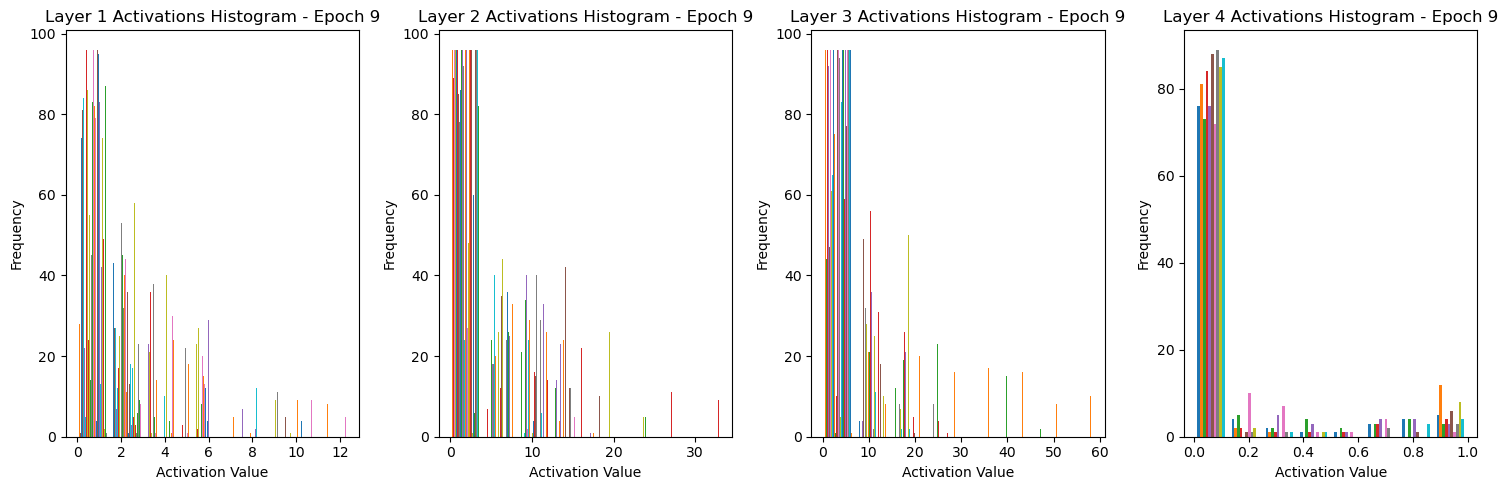

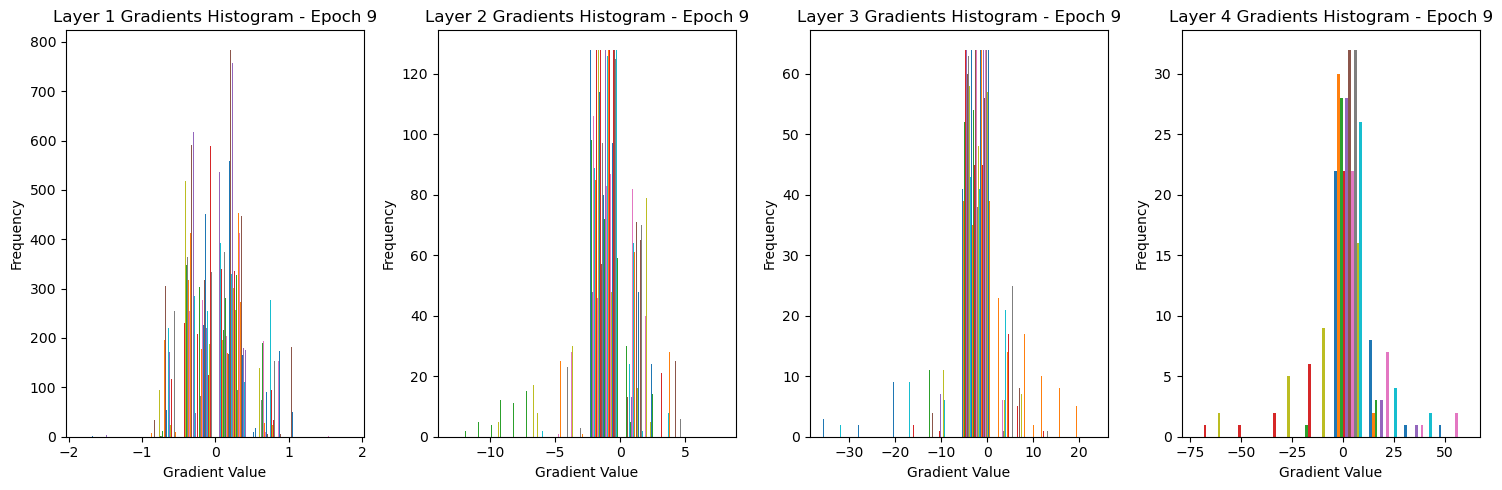

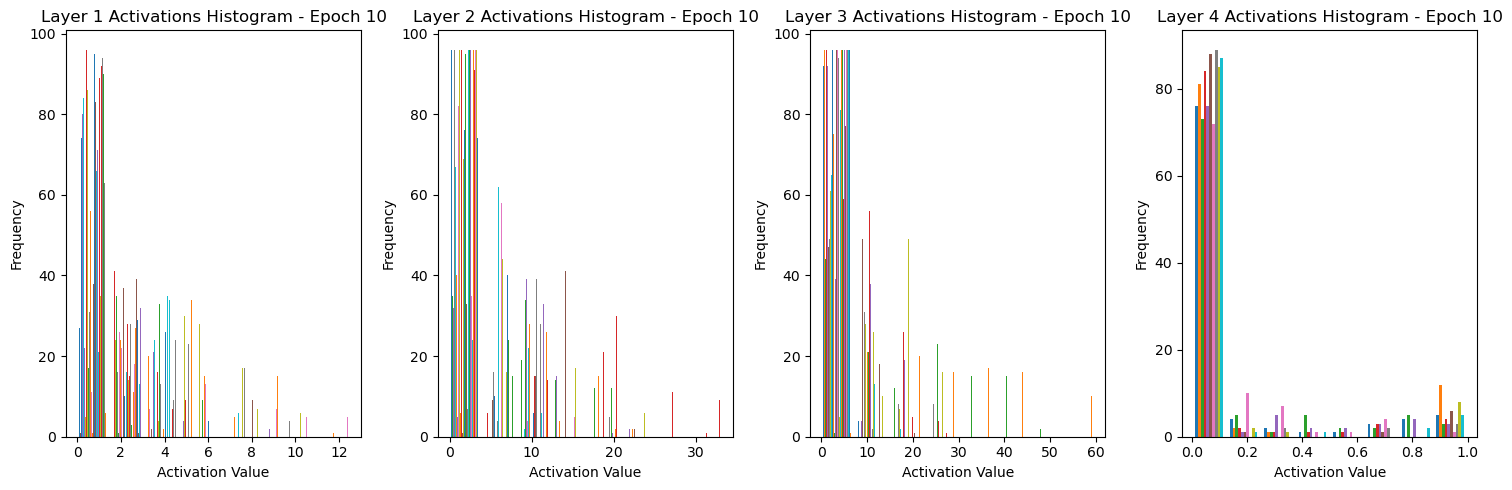

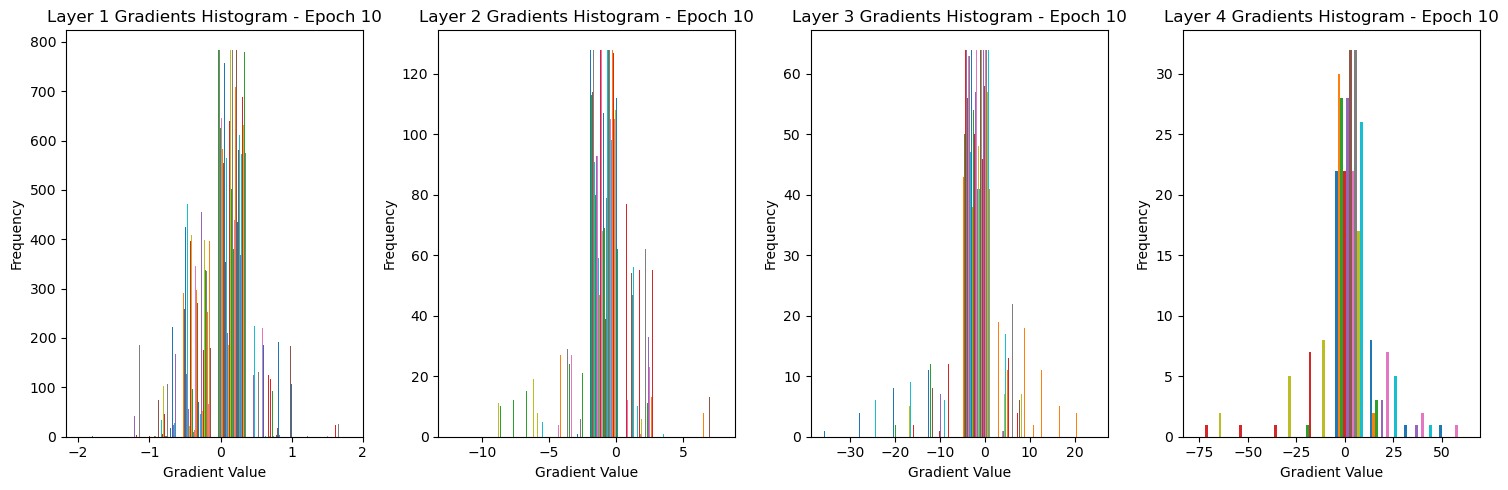

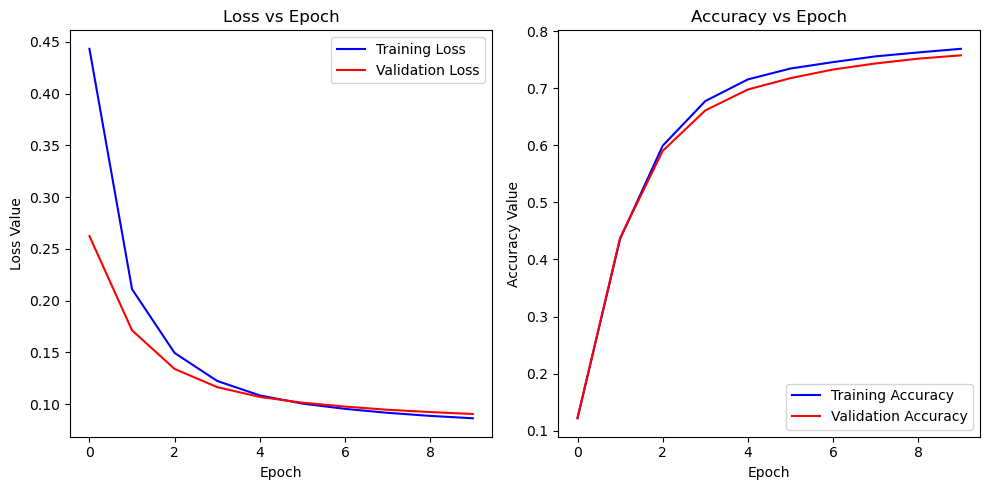

In [15]:
from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=LeakyReLu()))
model.add(Dense(n_units= 64, input_dim=128, activation=LeakyReLu()))
model.add(Dense(n_units= 32, input_dim=64, activation=LeakyReLu()))
model.add(Dense(n_units = 10, input_dim = 32, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001),
              loss=BinaryCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train_onehot, epochs=10, batch_size=512, X_val=X_test, y_val=y_test, verbose=True)


In [16]:
model.export_net('models/fashion_MNIST_model.joblib')

In [17]:
from nnlib.models.sequential import SequentialModel
model = SequentialModel.import_net('models/fashion_MNIST_model.joblib')
predictions = model.predict(X_val)

In [18]:
pred_fashion=[]
for i in predictions:
    # print(i)
    pred_fashion.append(np.argmax(i))

In [19]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), pred_fashion))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       487
           1       0.98      0.95      0.96       492
           2       0.77      0.69      0.73       514
           3       0.84      0.87      0.85       478
           4       0.67      0.81      0.73       506
           5       0.96      0.88      0.91       519
           6       0.66      0.53      0.59       496
           7       0.90      0.90      0.90       522
           8       0.93      0.96      0.94       490
           9       0.87      0.94      0.90       496

    accuracy                           0.83      5000
   macro avg       0.84      0.84      0.83      5000
weighted avg       0.84      0.83      0.83      5000



Epoch 1/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 2/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 3/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 4/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 5/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 6/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 7/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 8/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 9/10 - loss: 0.6931 - val_loss: 0.6931
Epoch 10/10 - loss: 0.6931 - val_loss: 0.6931


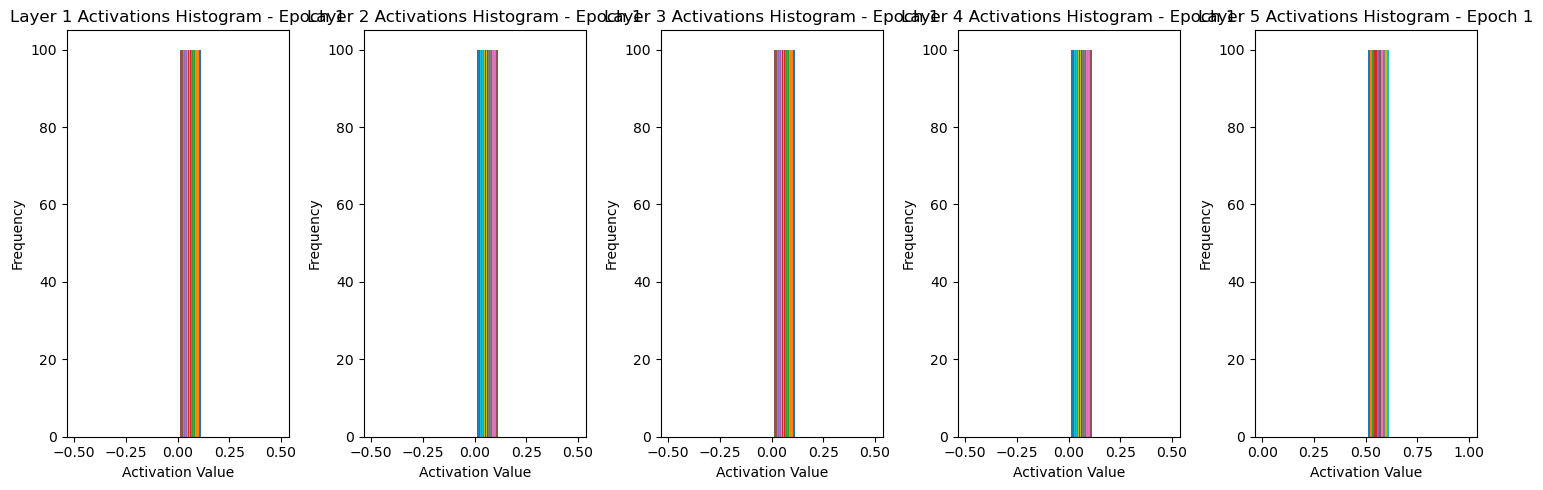

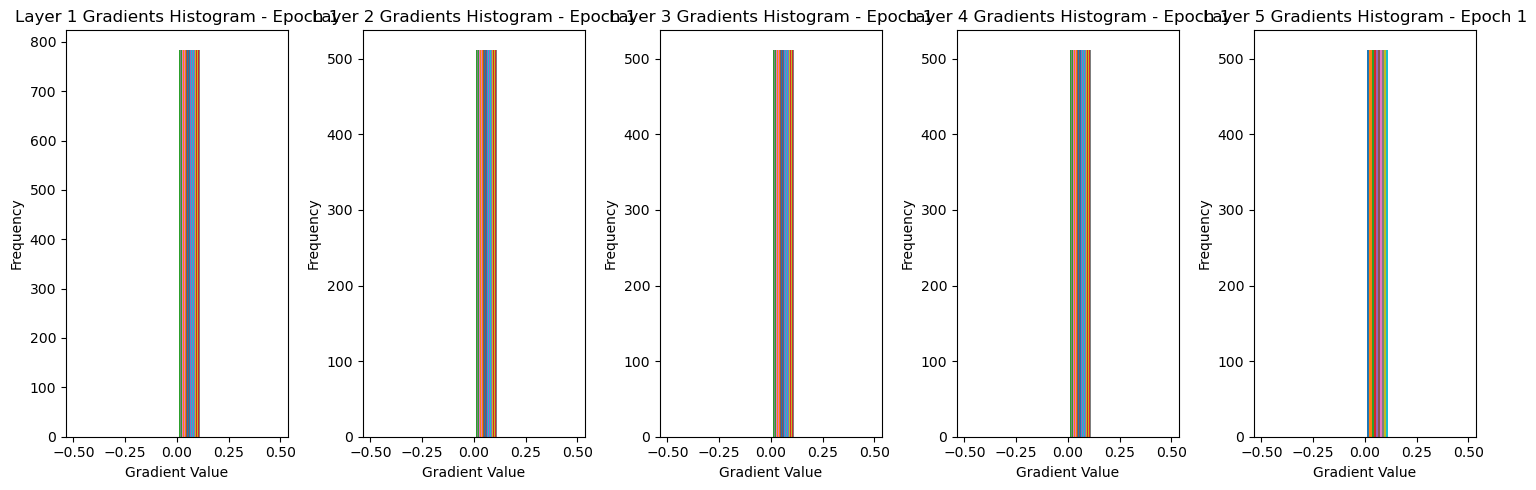

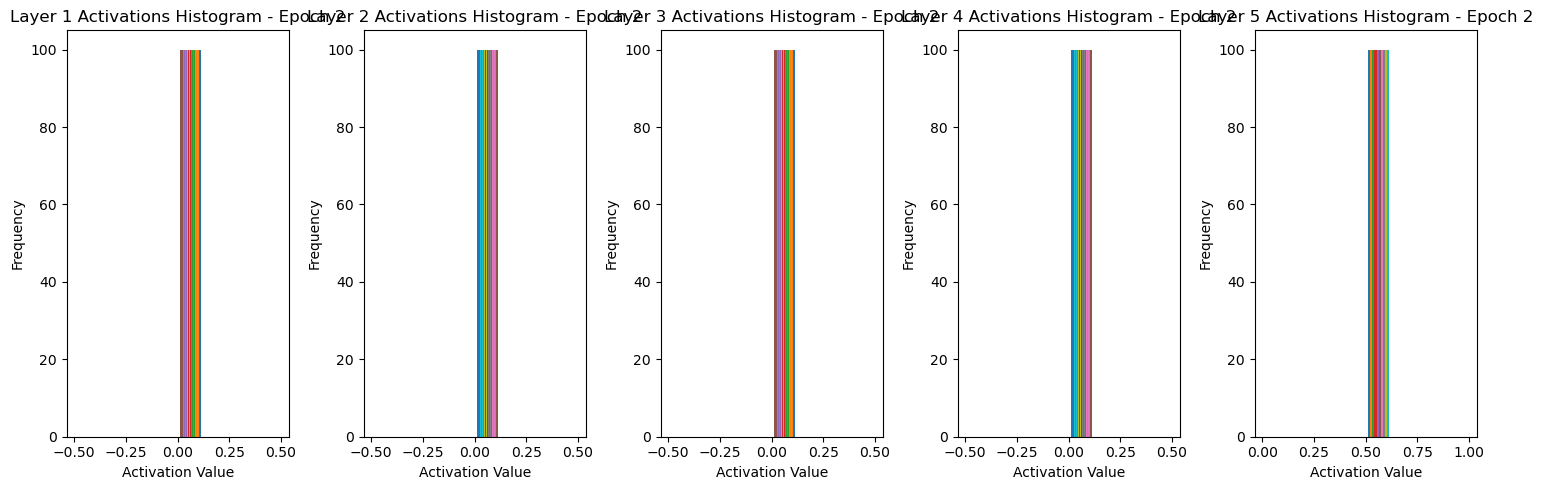

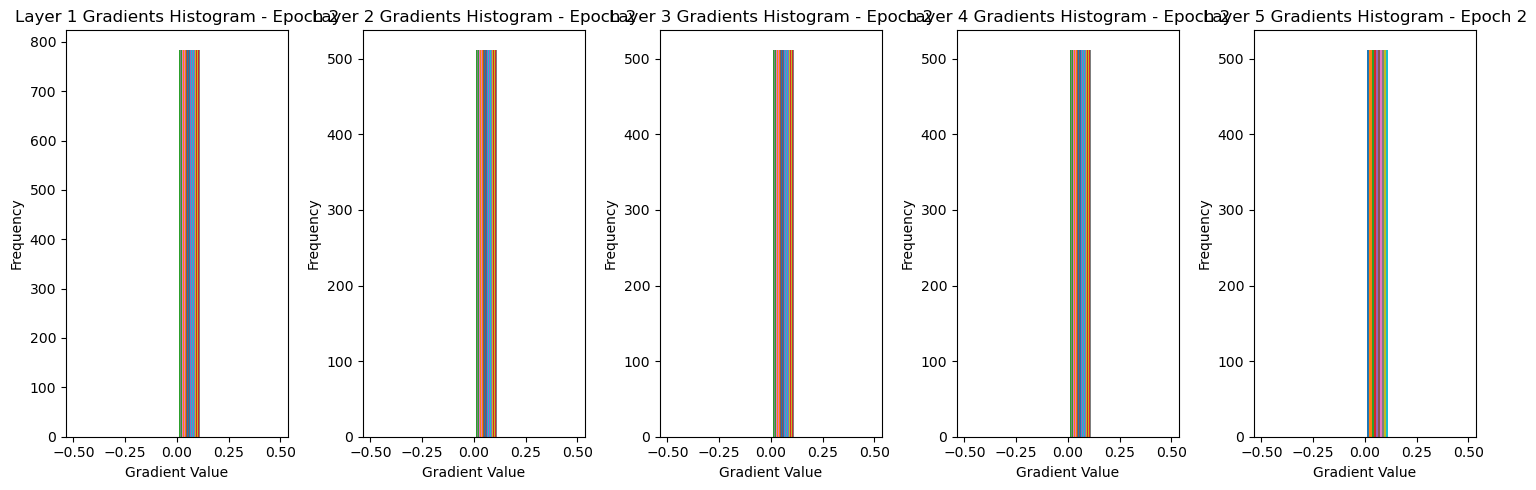

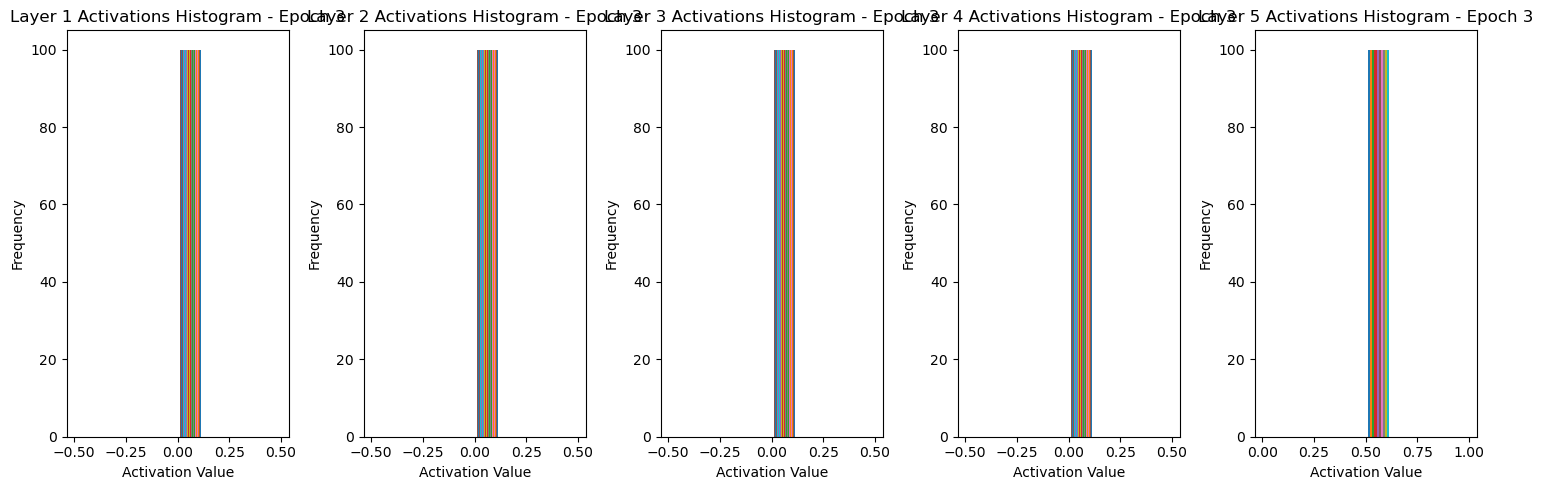

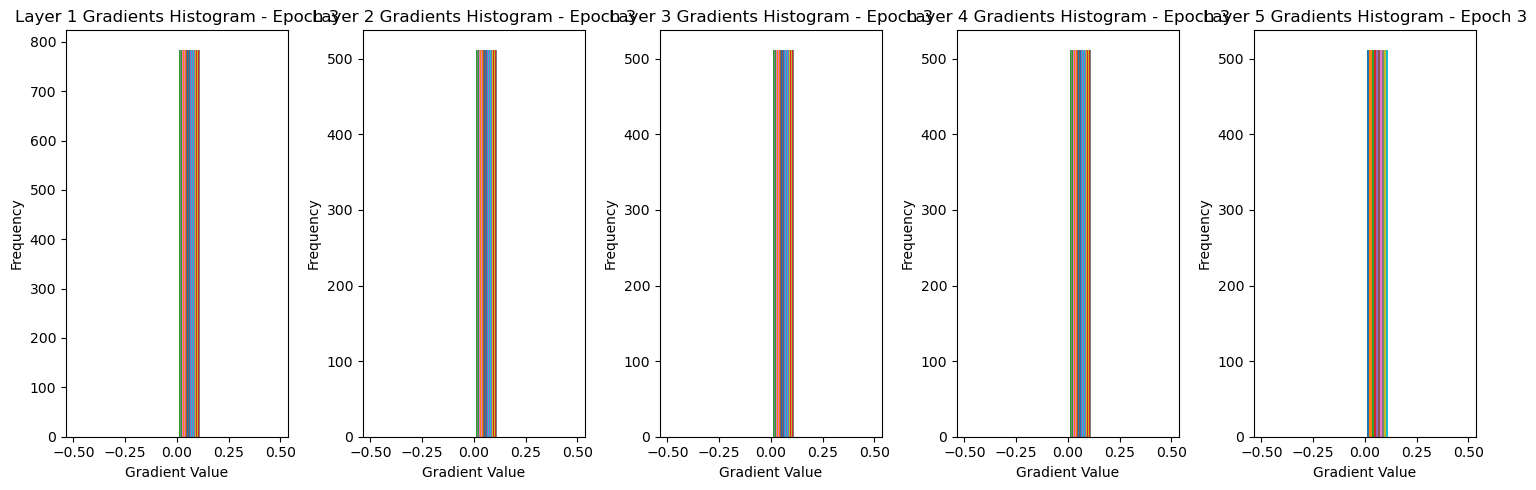

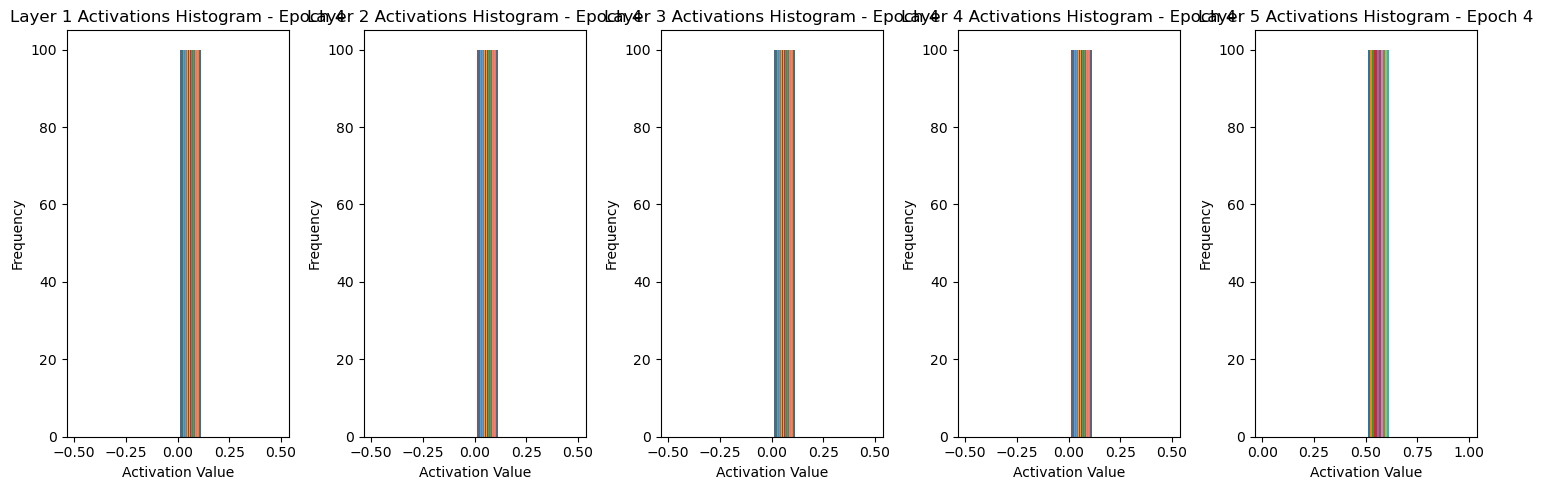

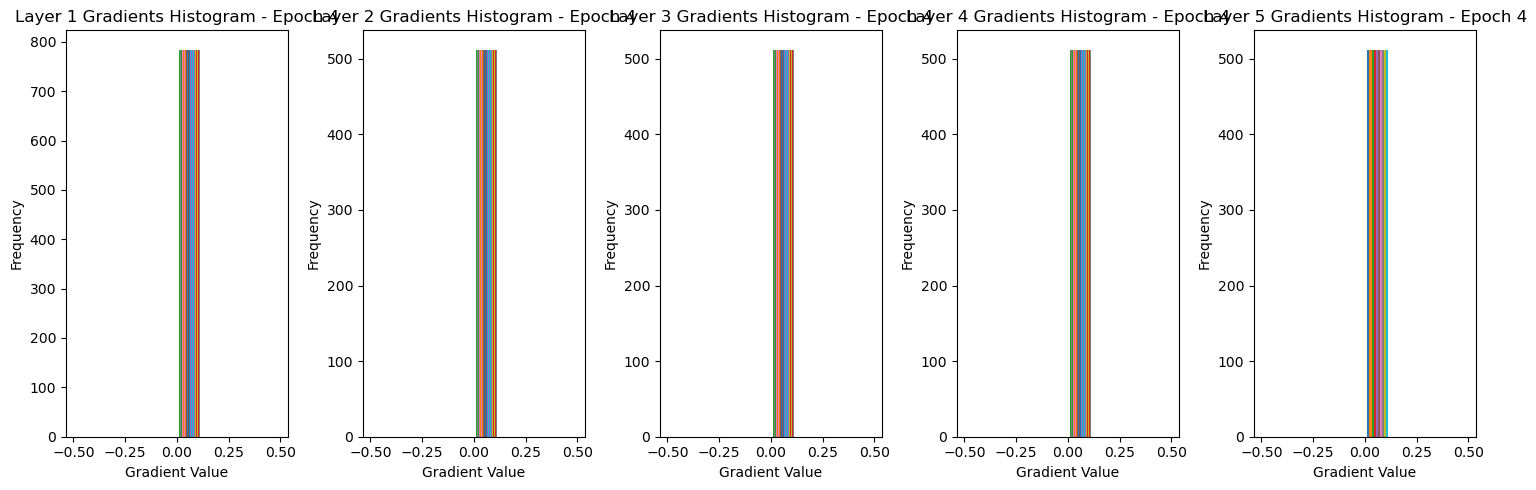

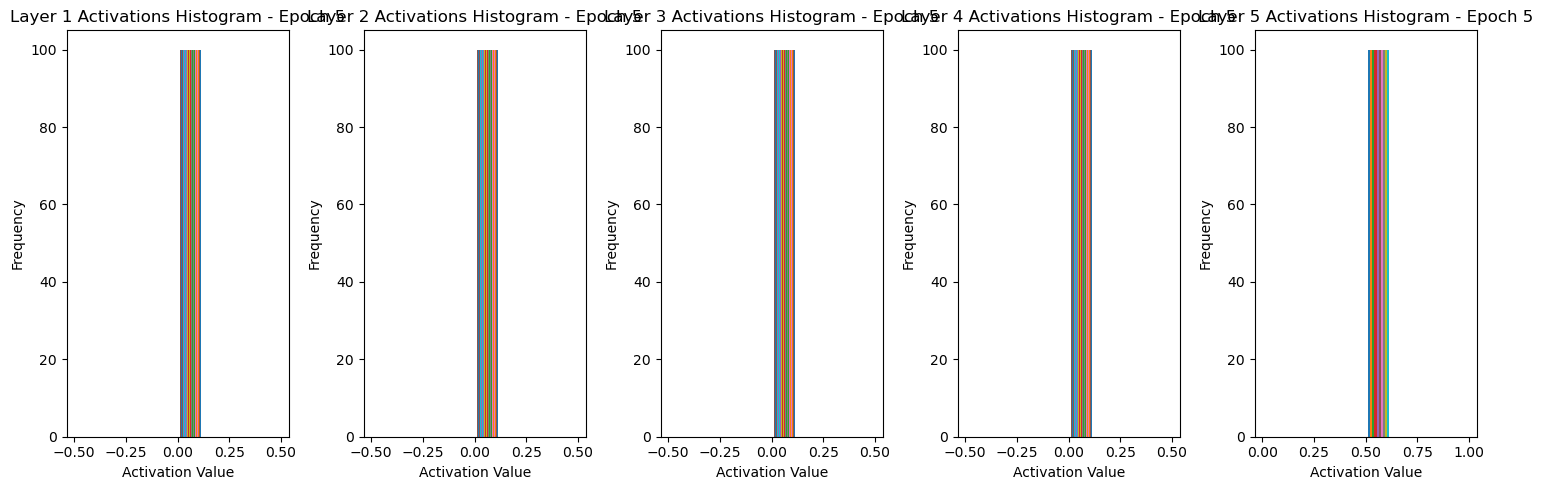

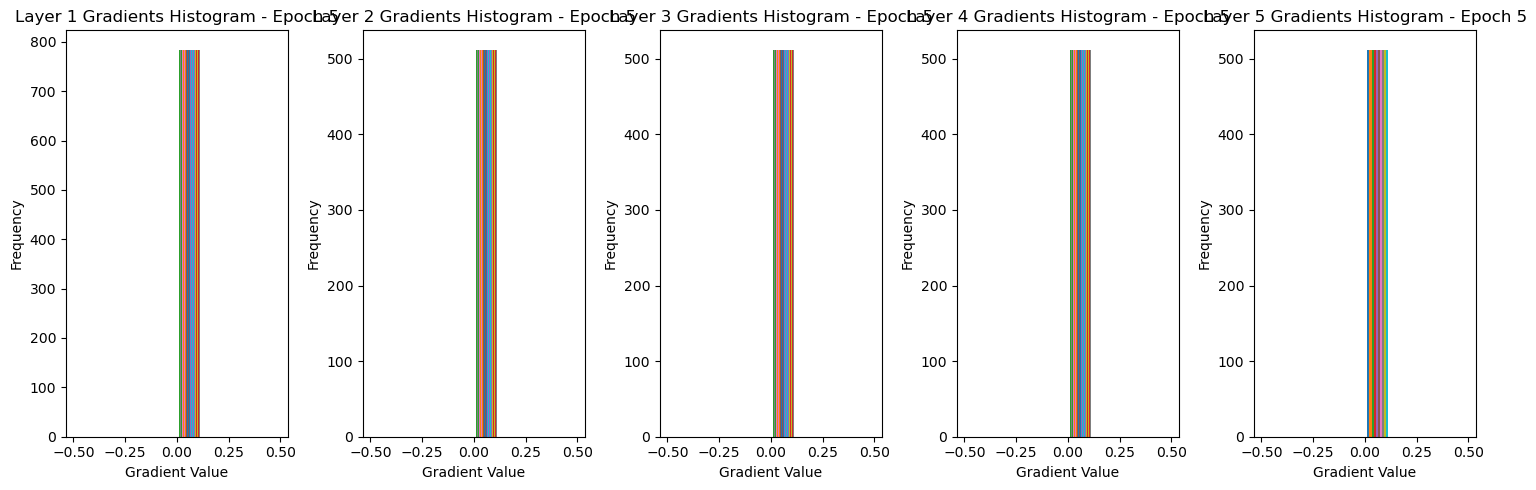

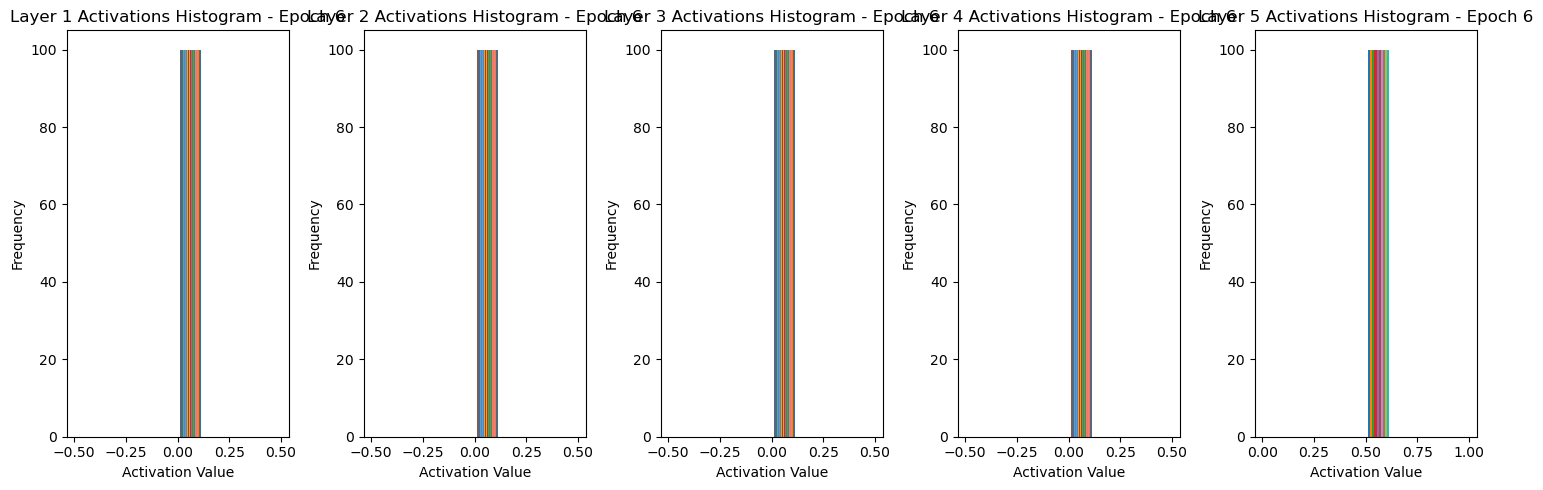

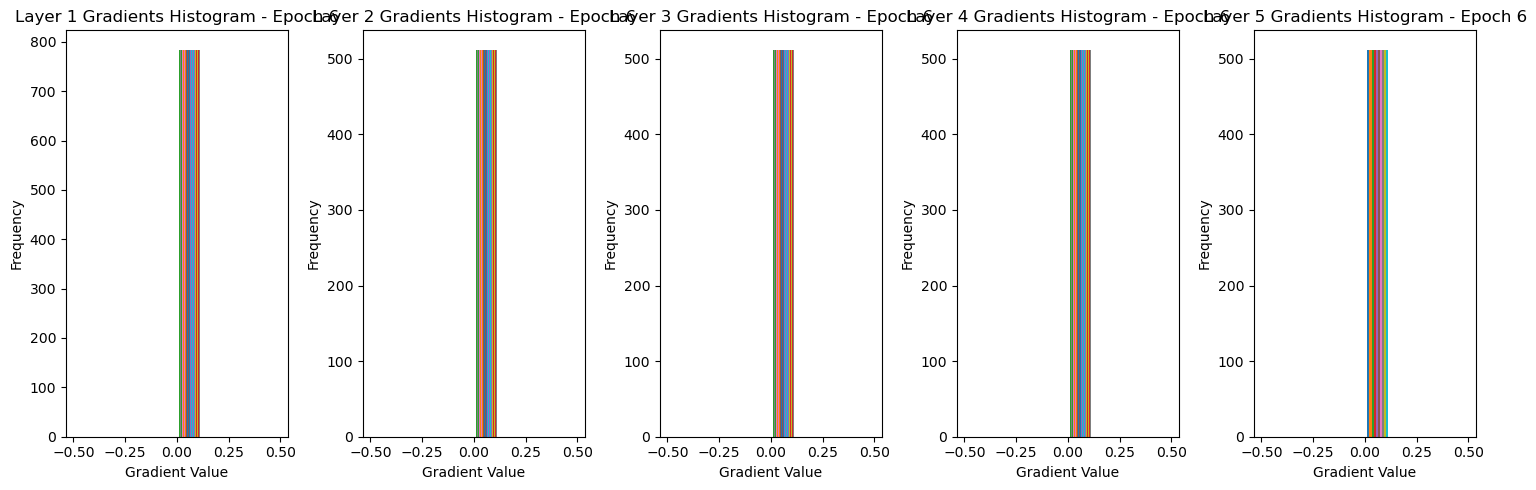

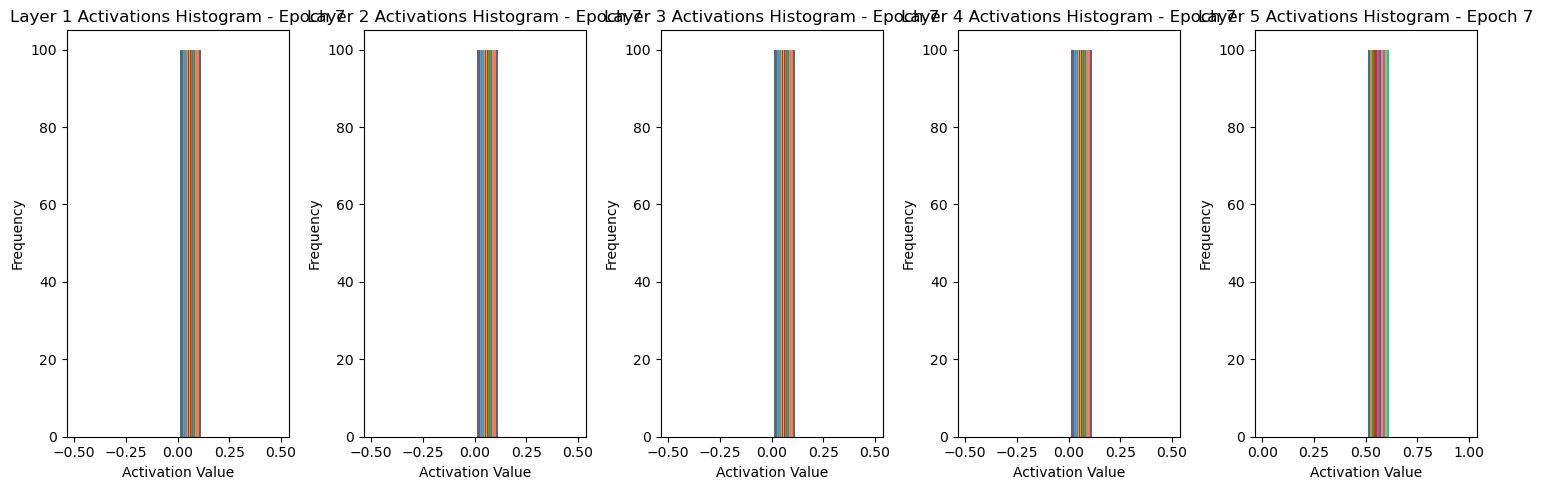

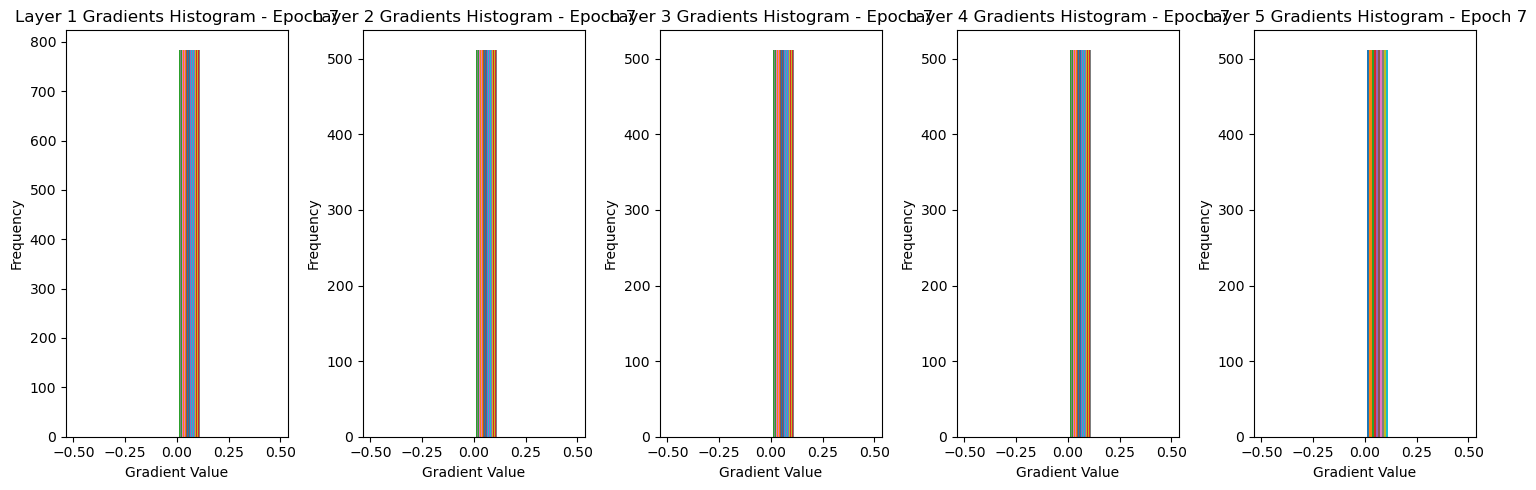

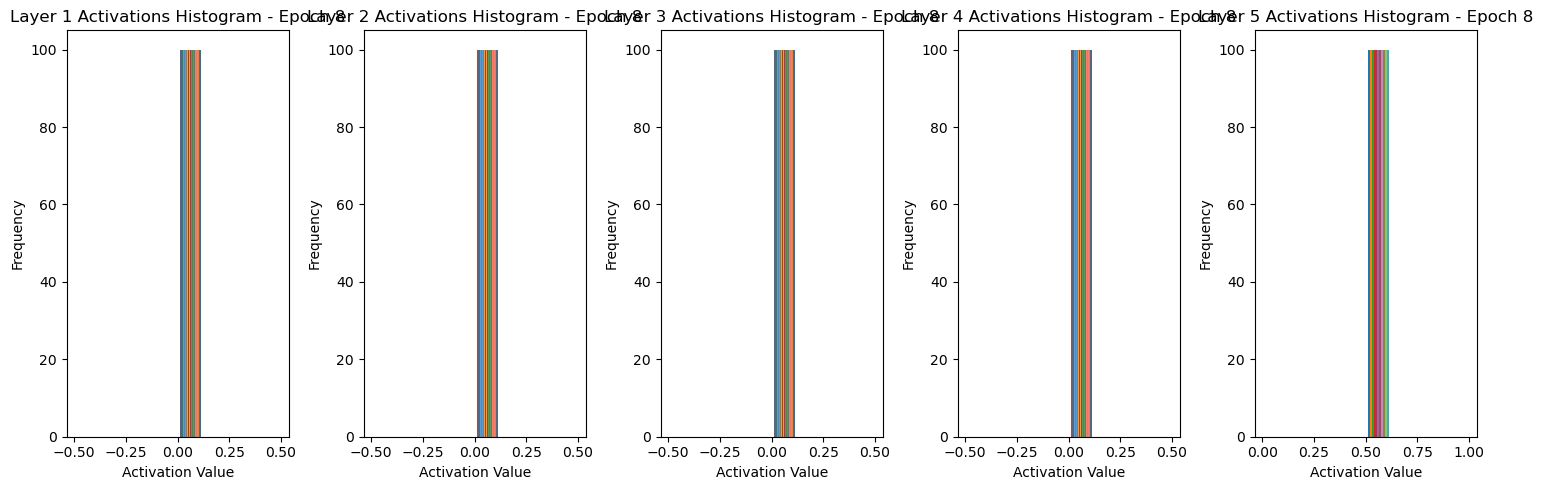

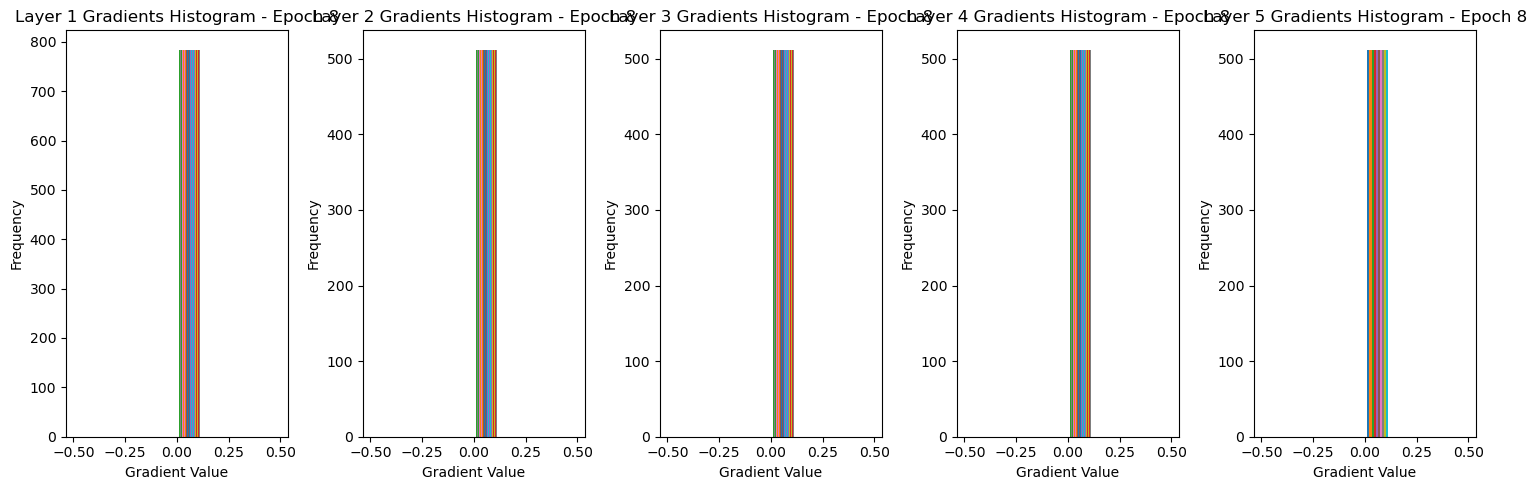

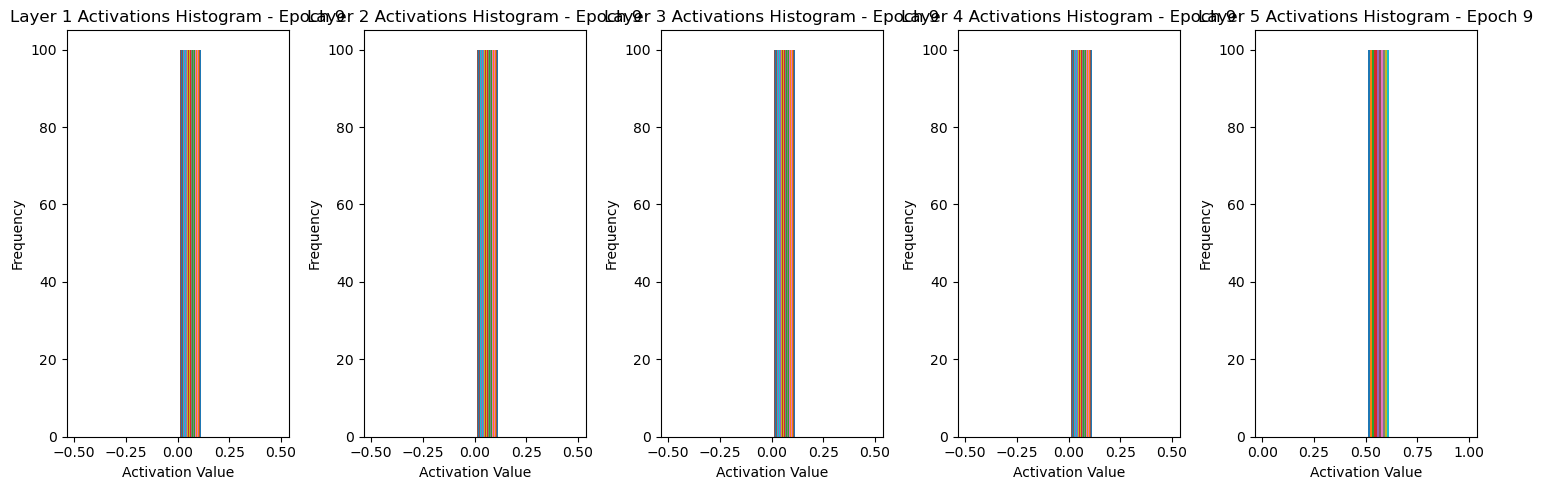

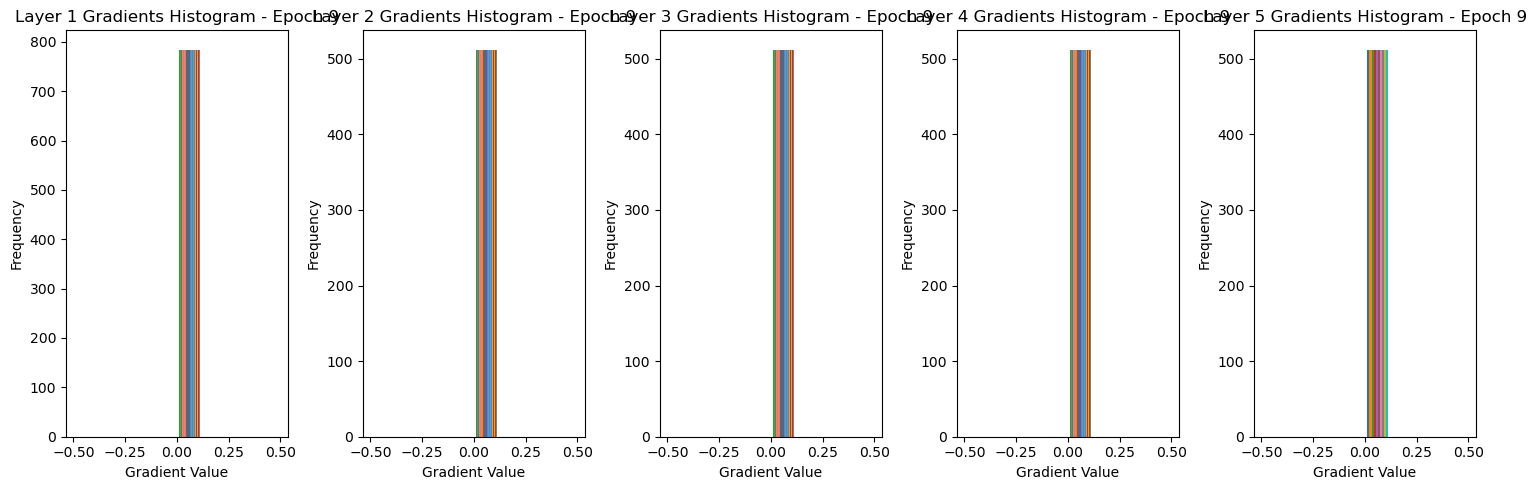

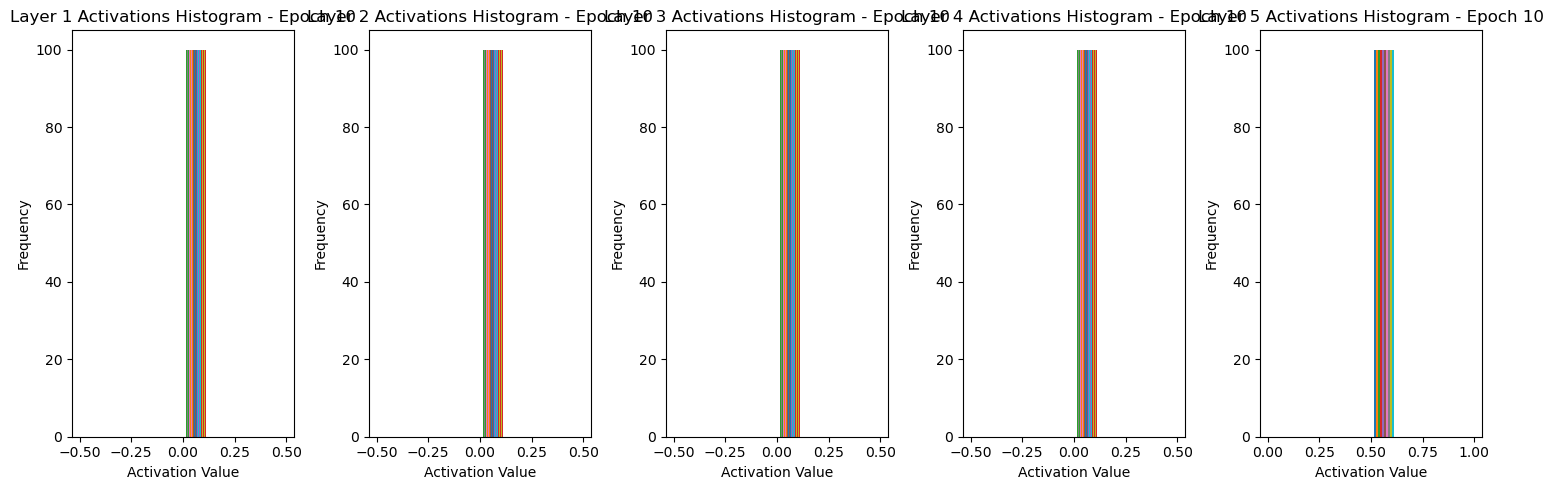

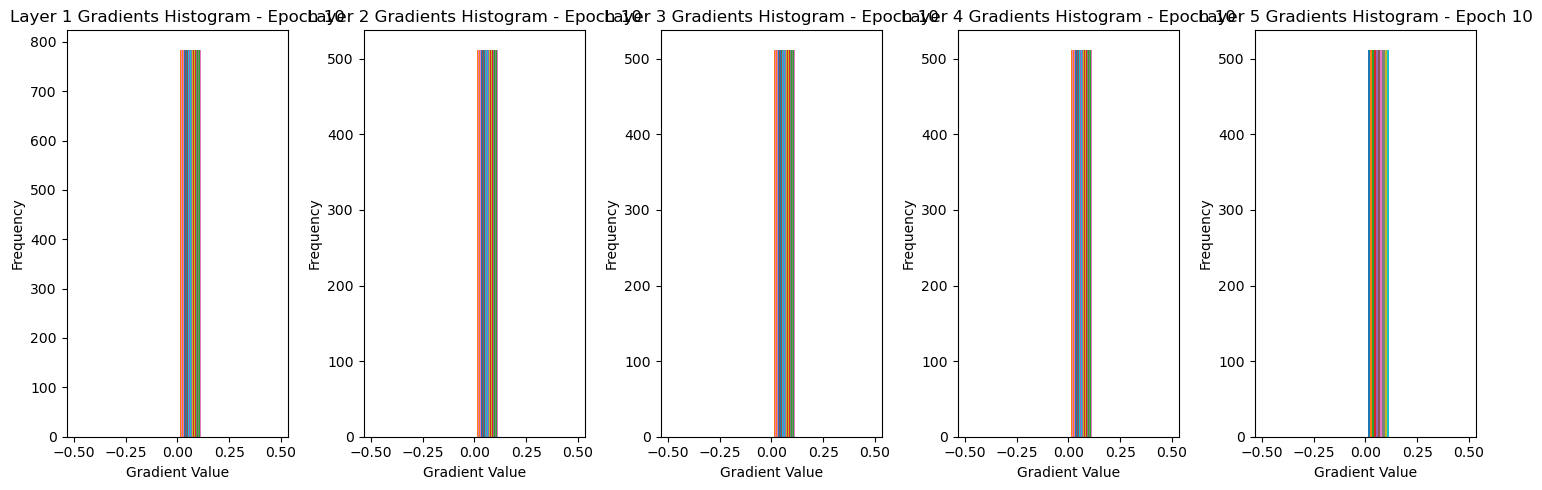

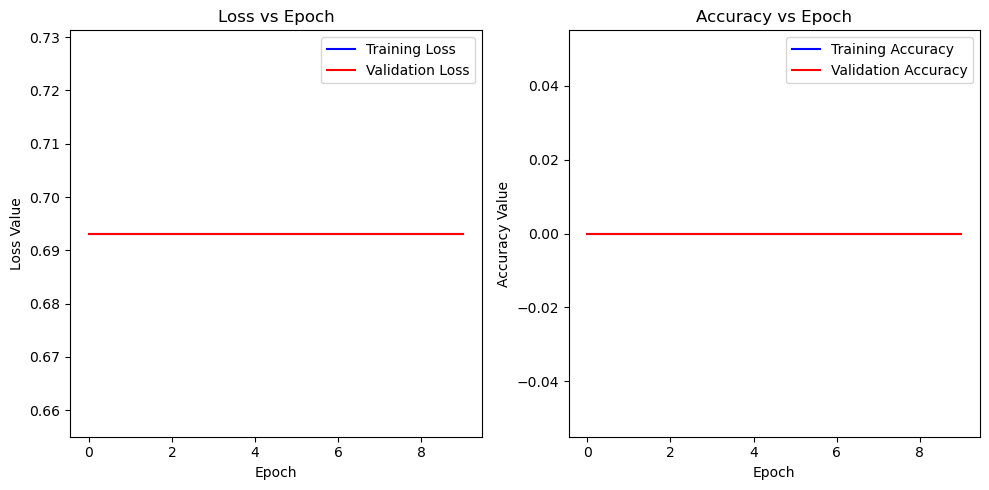

In [22]:
from nnlib.initialization_functions.uniform import Uniform
from nnlib.activation_functions.tanh import Tanh

model = SequentialModel()


model.add(Dense(n_units= 512, input_dim=784, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units = 10, input_dim = 512, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.001),
              loss=BinaryCrossEntropy(),
              initializer=Uniform(low_limit = 0, high_limit =0))

model.fit(X_train, y_train_onehot, epochs=10, batch_size=100, X_val=X_test, y_val=y_test, verbose=True)


Epoch 1/10 - loss: 1.4585 - val_loss: 0.8140
Epoch 2/10 - loss: 0.6361 - val_loss: 0.5272
Epoch 3/10 - loss: 0.4046 - val_loss: 0.3319
Epoch 4/10 - loss: 0.2728 - val_loss: 0.2450
Epoch 5/10 - loss: 0.2187 - val_loss: 0.2049
Epoch 6/10 - loss: 0.1876 - val_loss: 0.1814
Epoch 7/10 - loss: 0.1679 - val_loss: 0.1662
Epoch 8/10 - loss: 0.1553 - val_loss: 0.1541
Epoch 9/10 - loss: 0.1452 - val_loss: 0.1483
Epoch 10/10 - loss: 0.1397 - val_loss: 0.1430


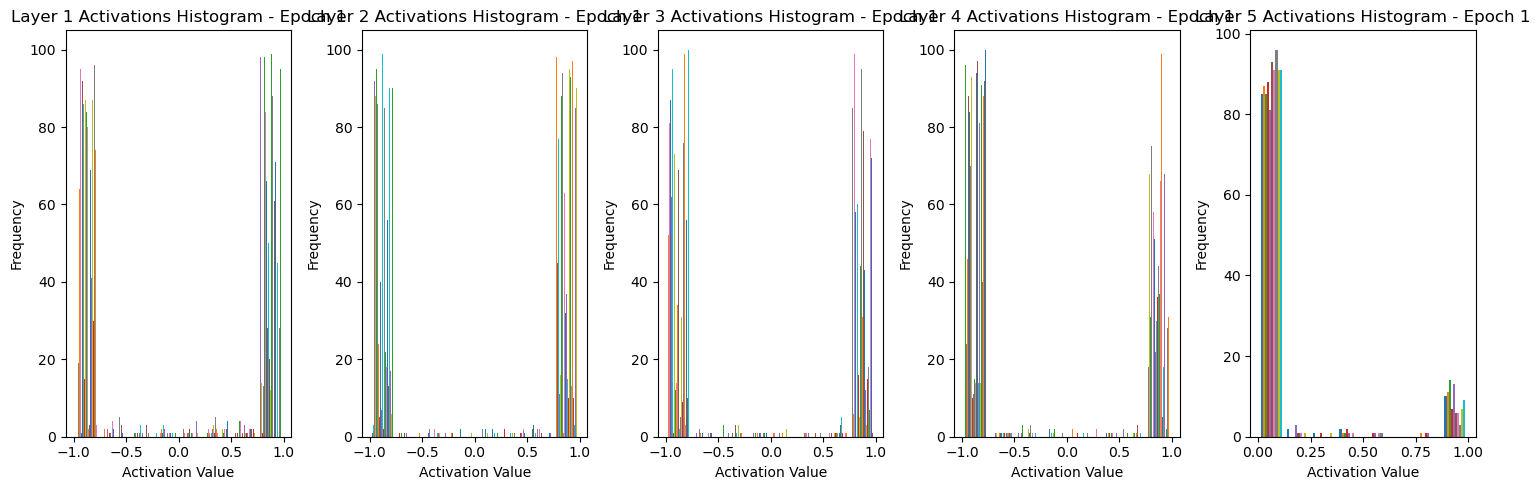

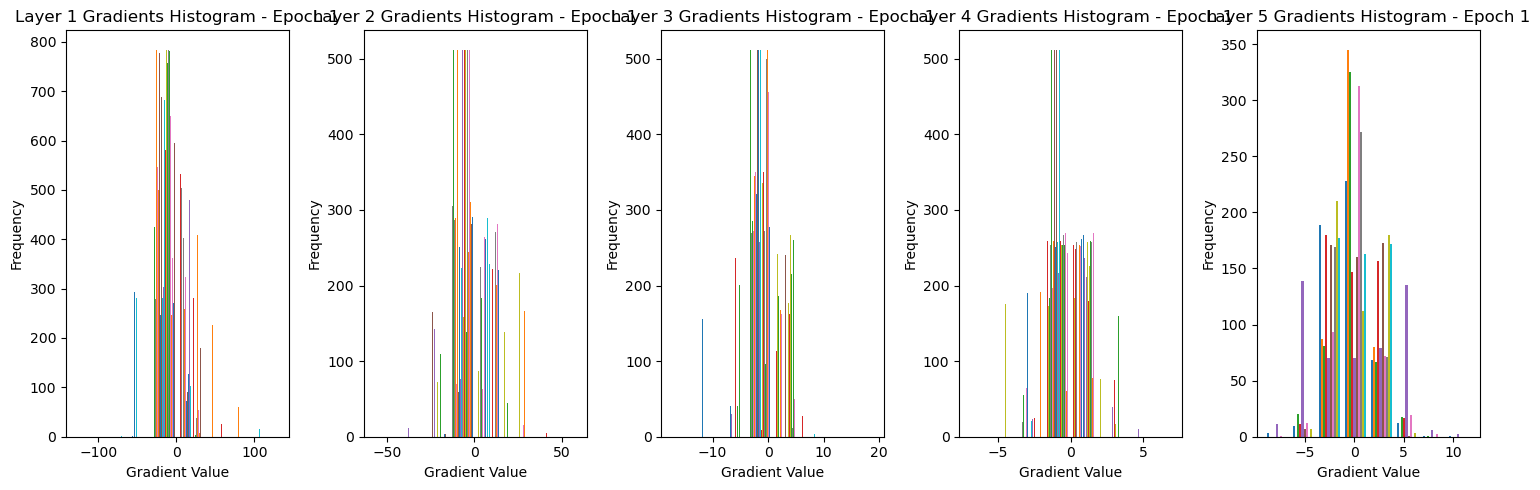

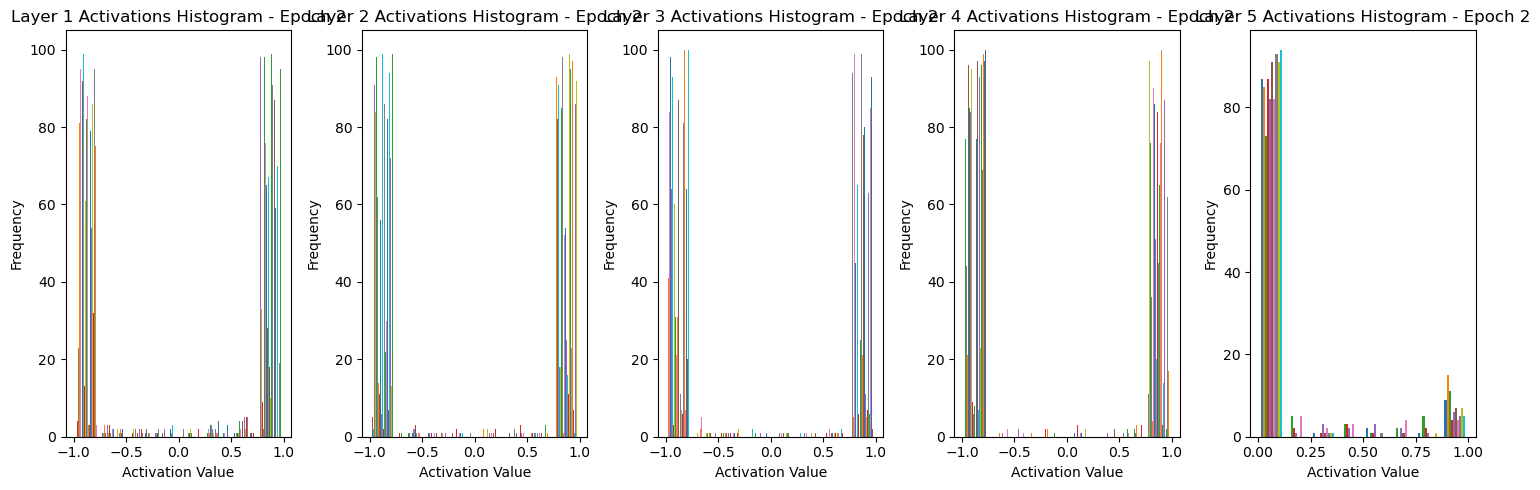

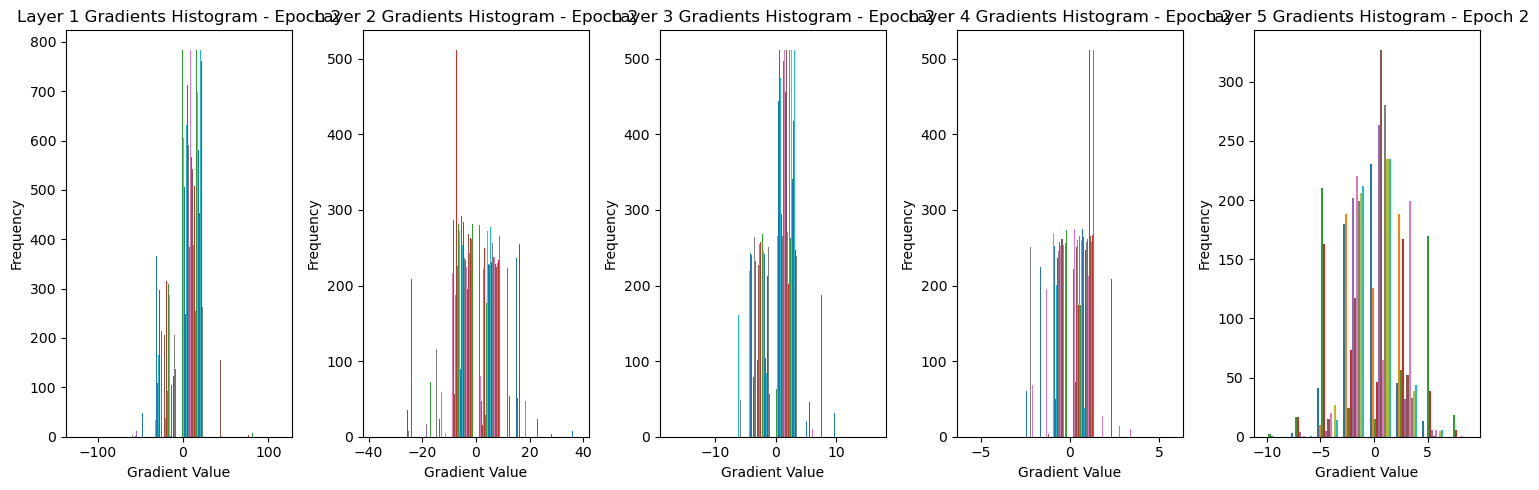

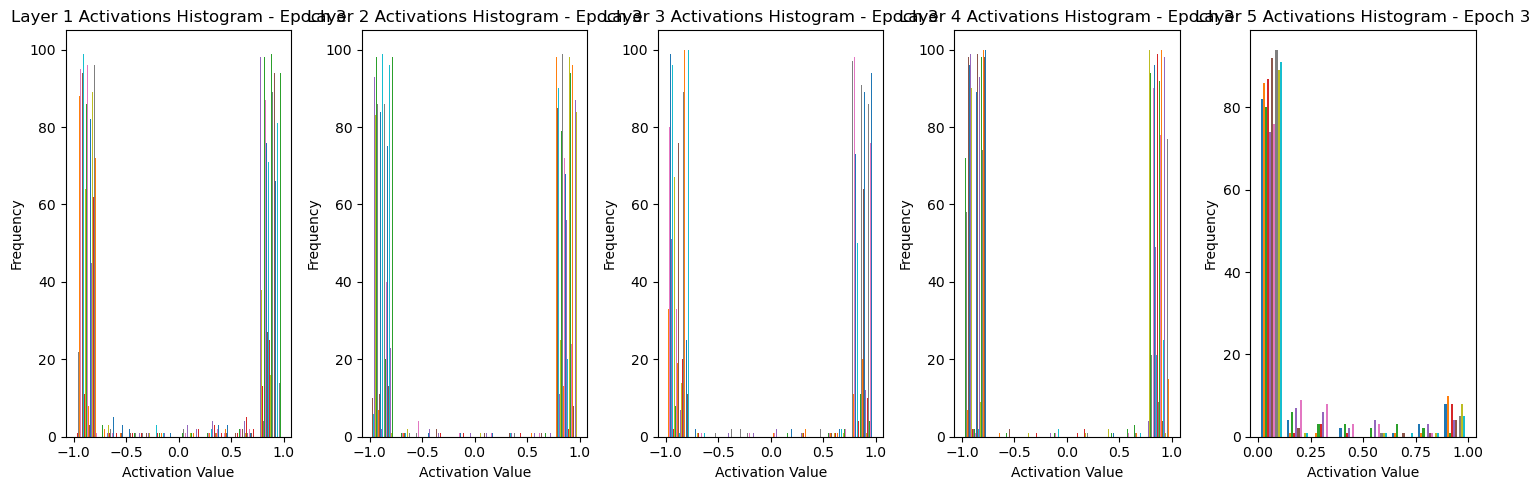

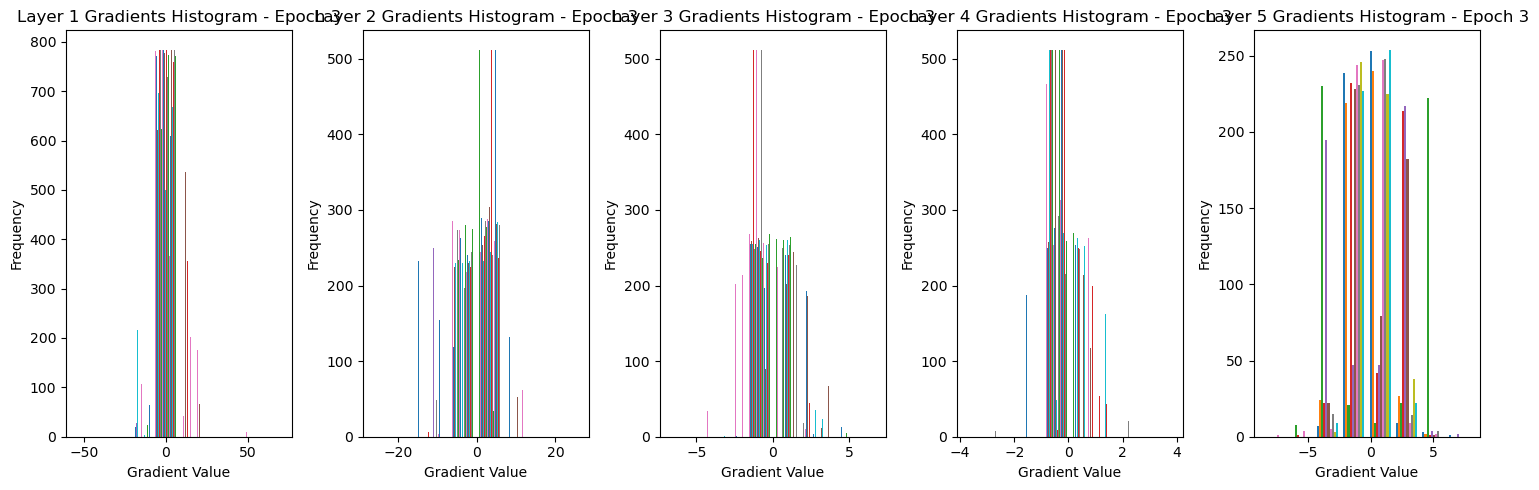

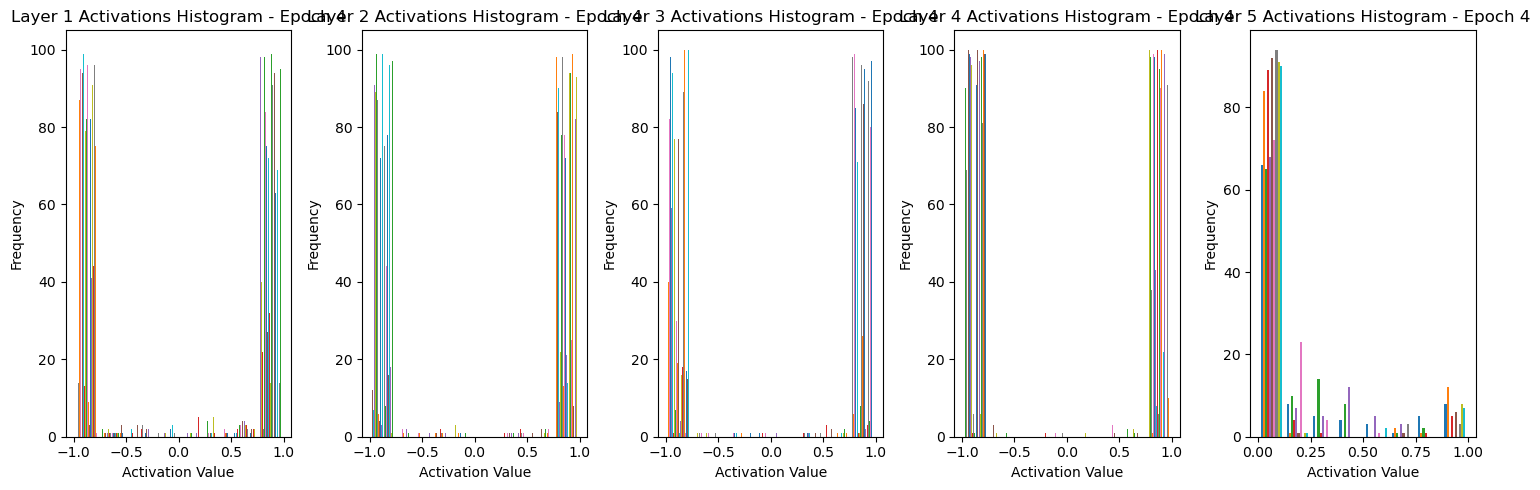

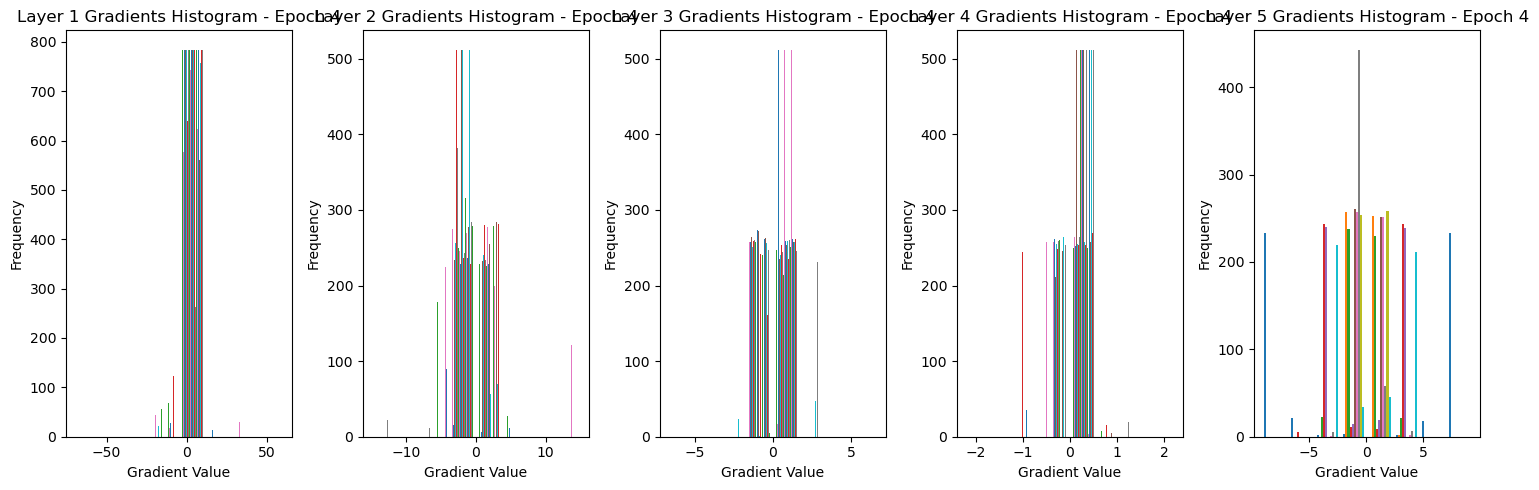

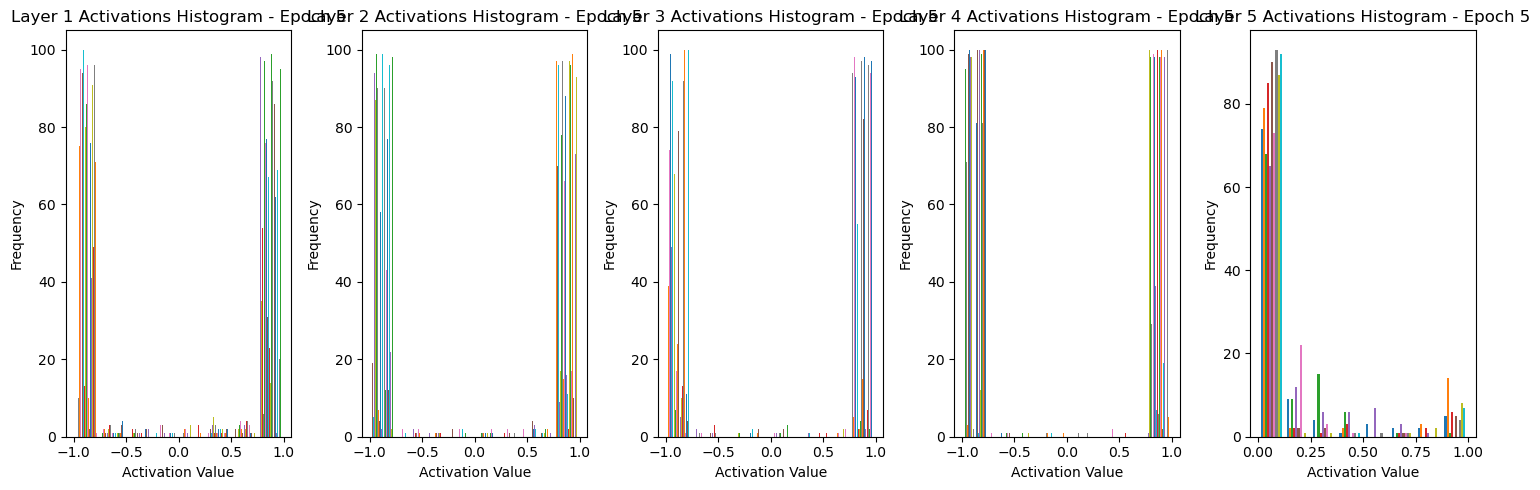

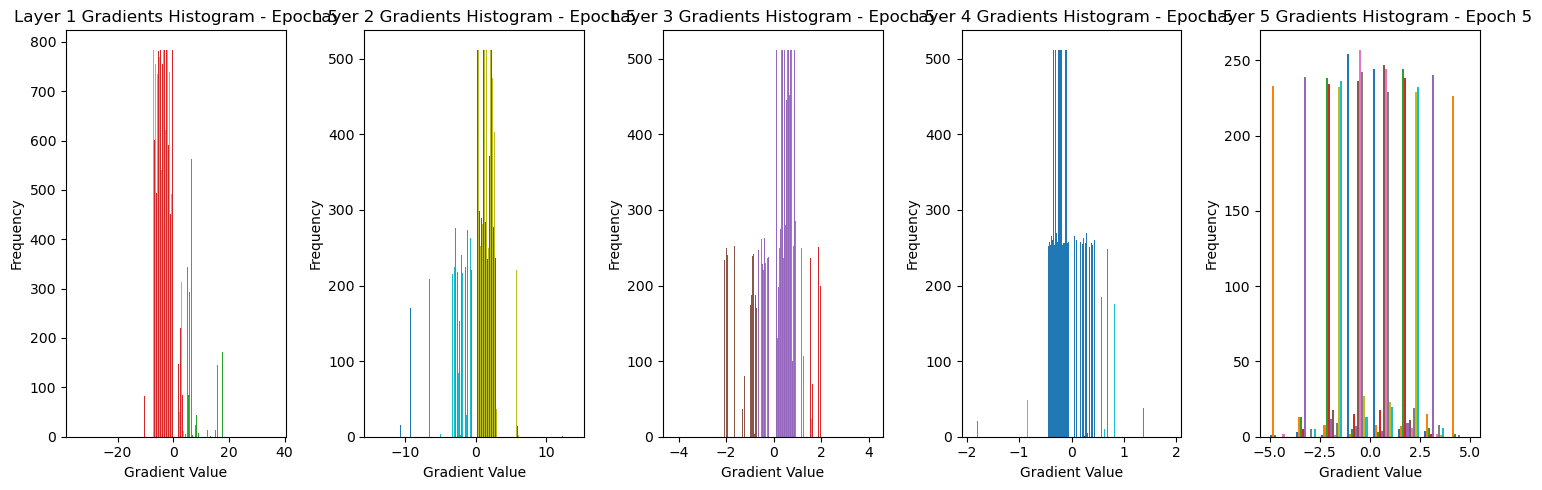

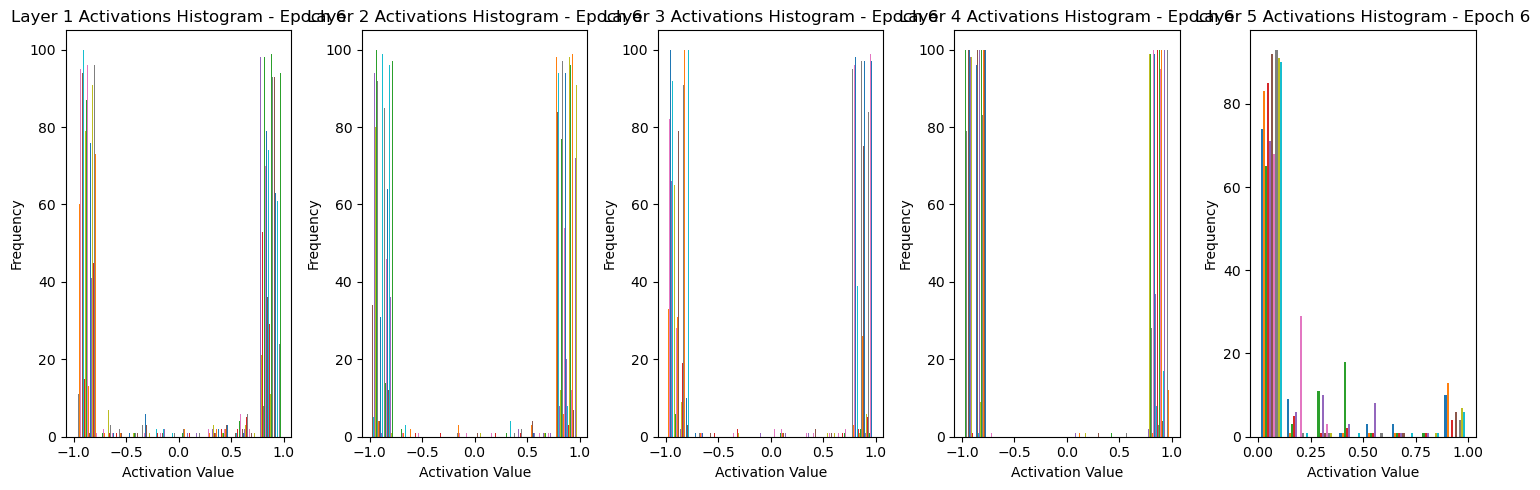

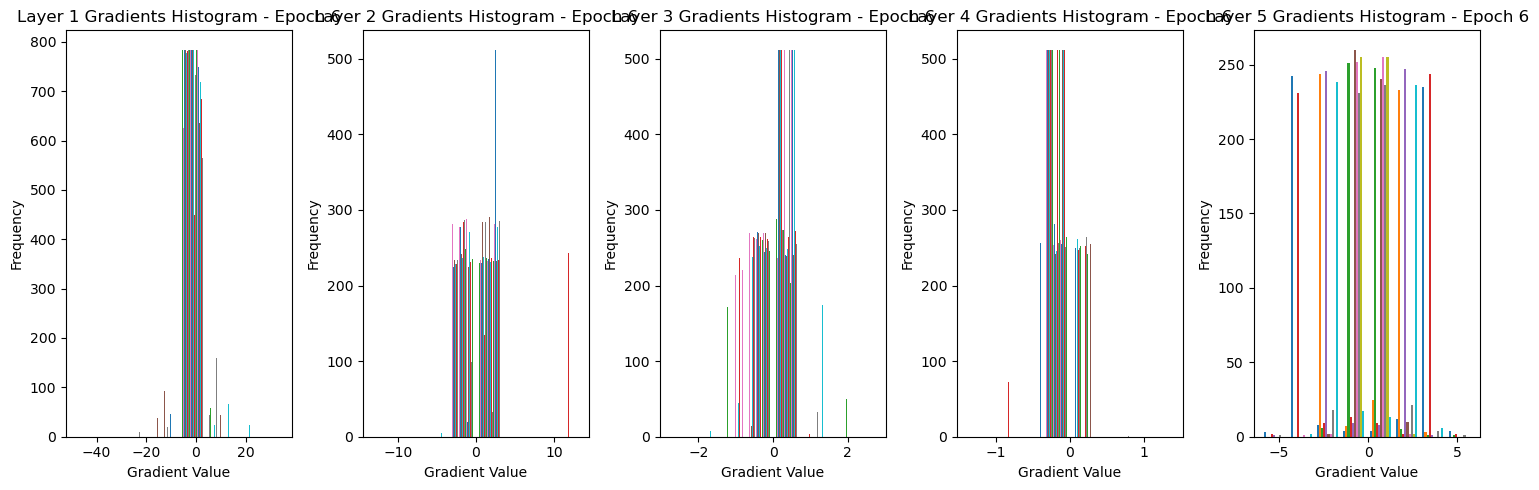

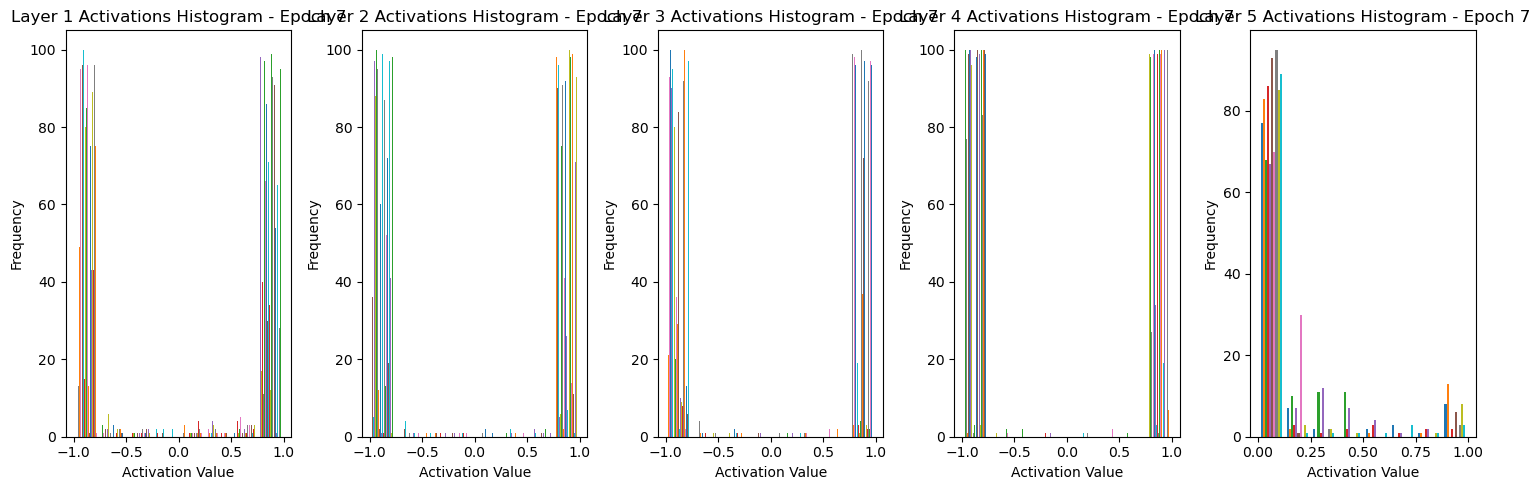

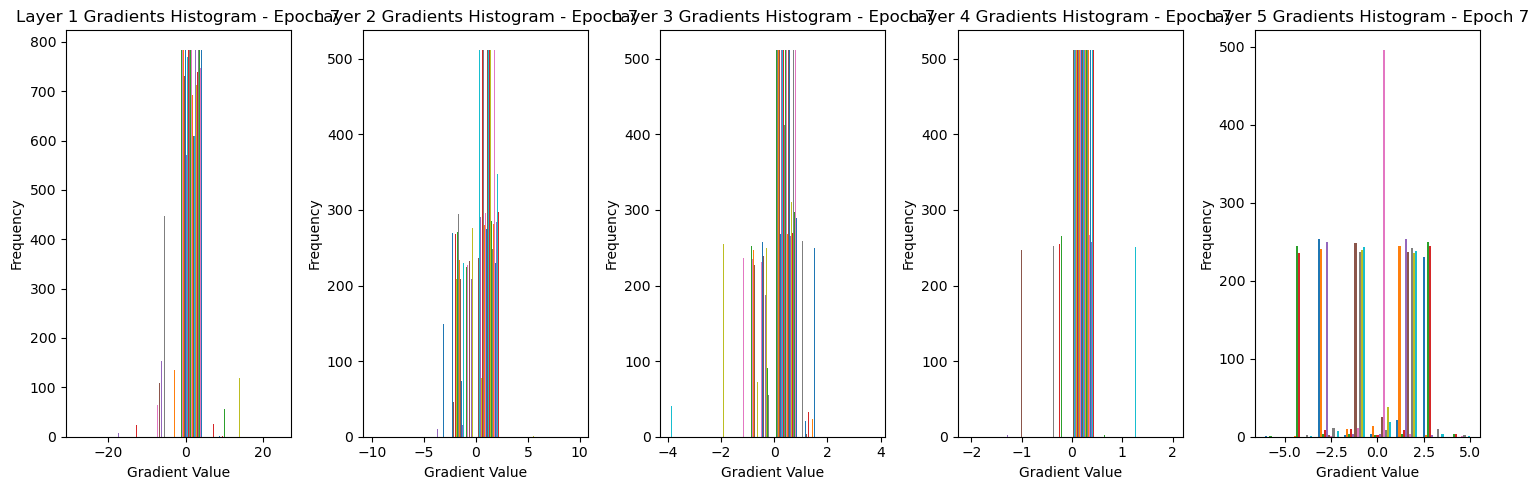

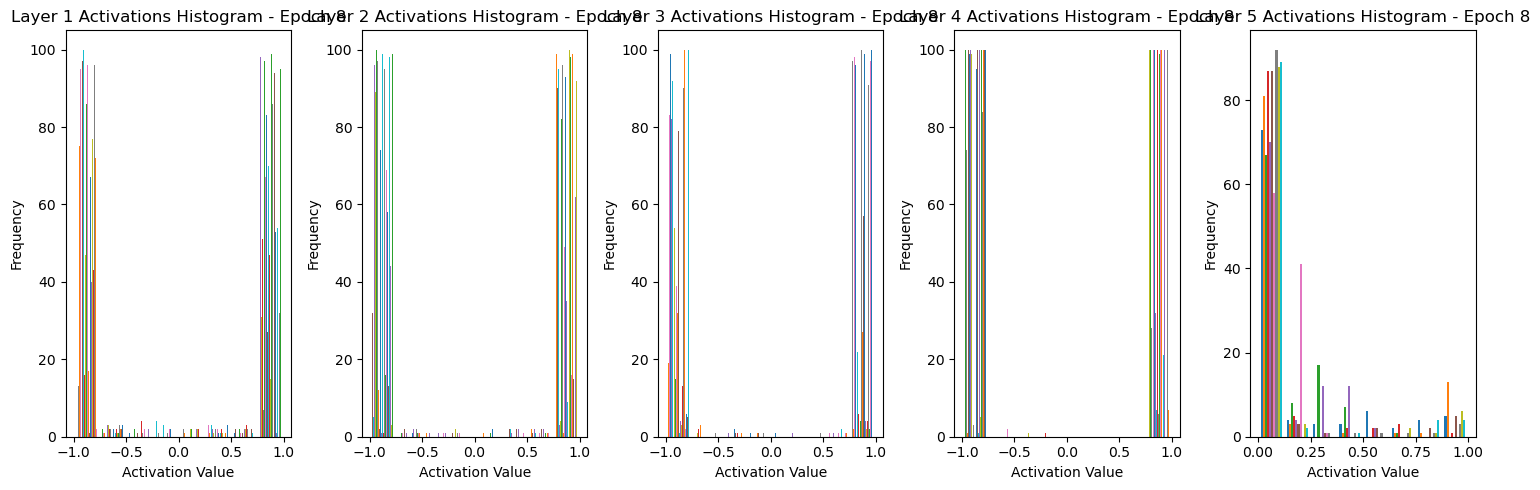

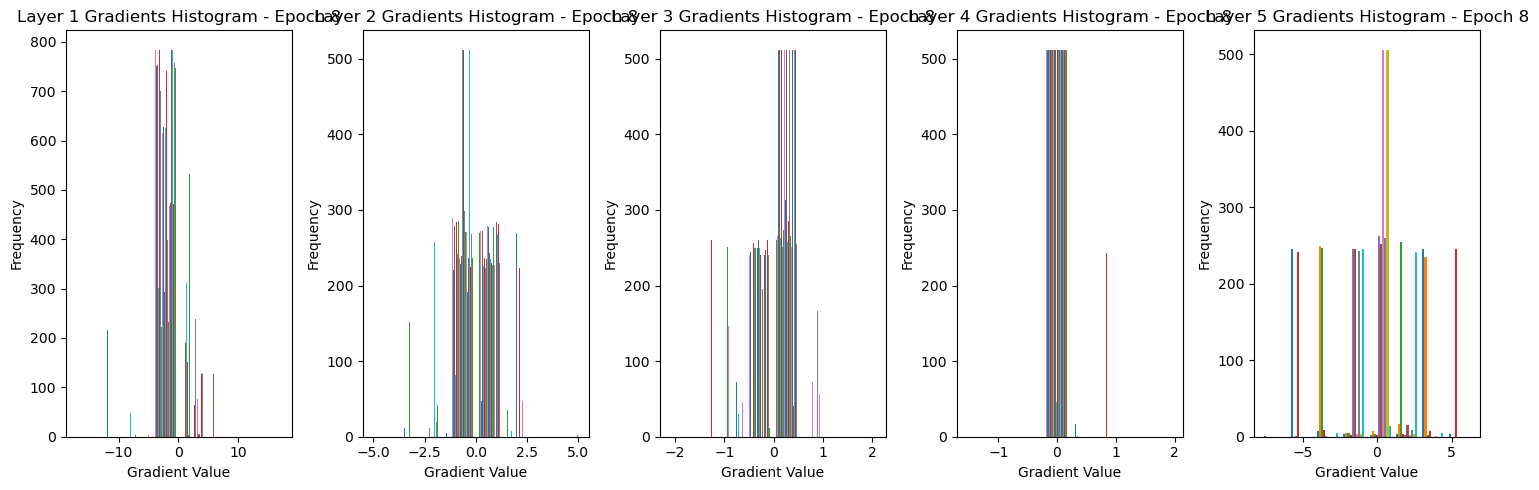

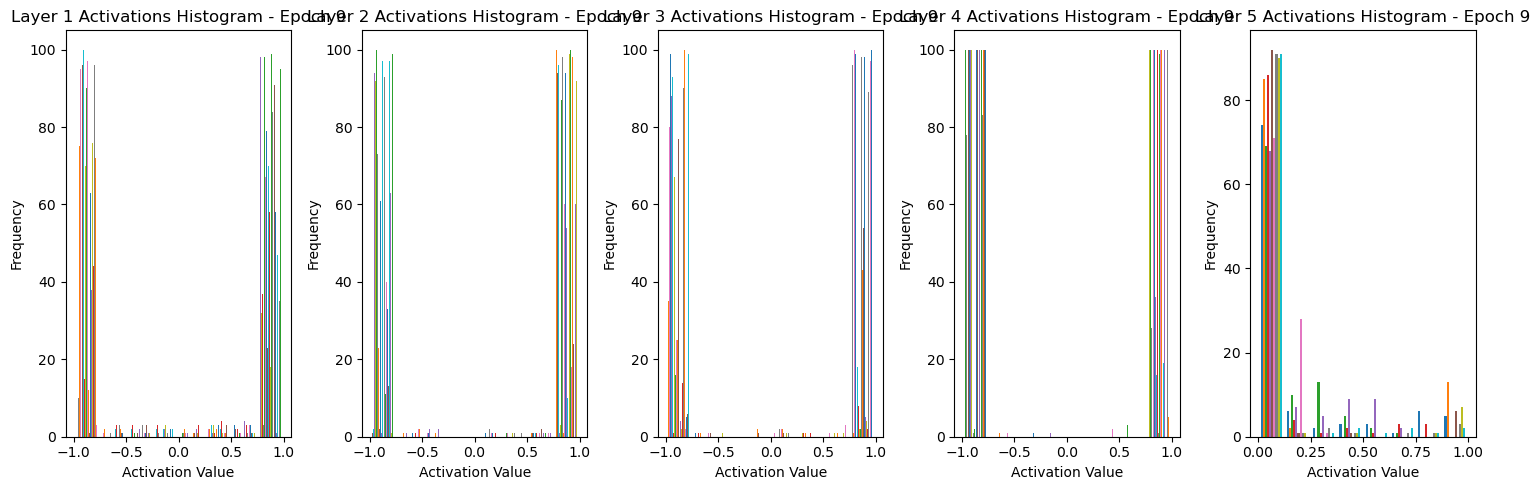

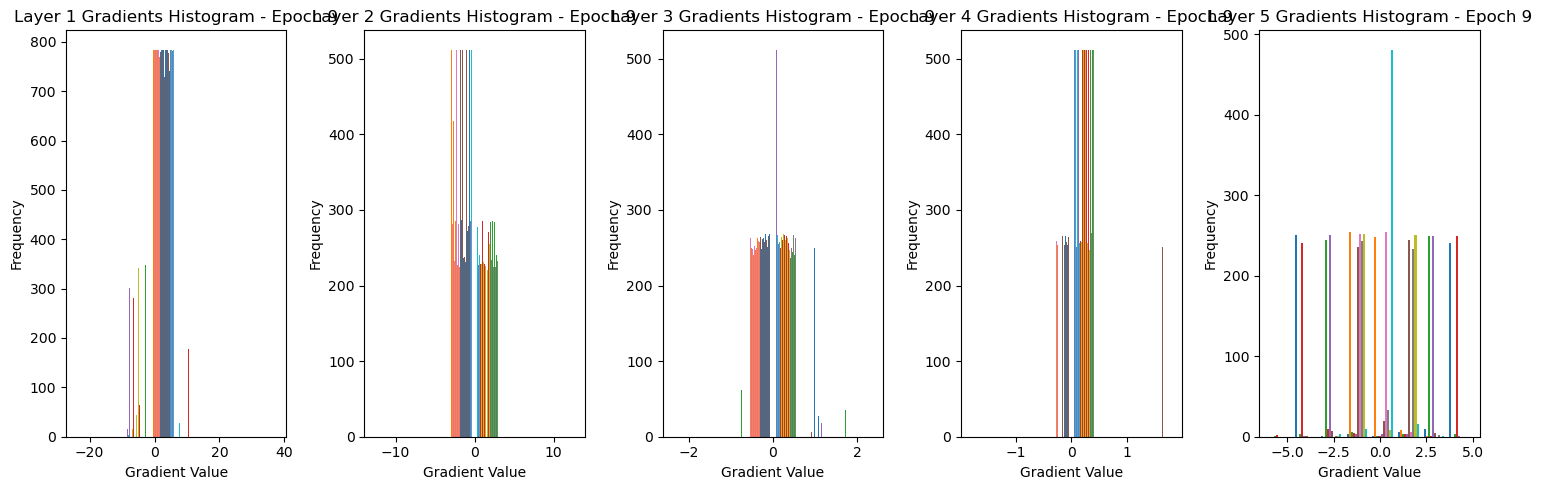

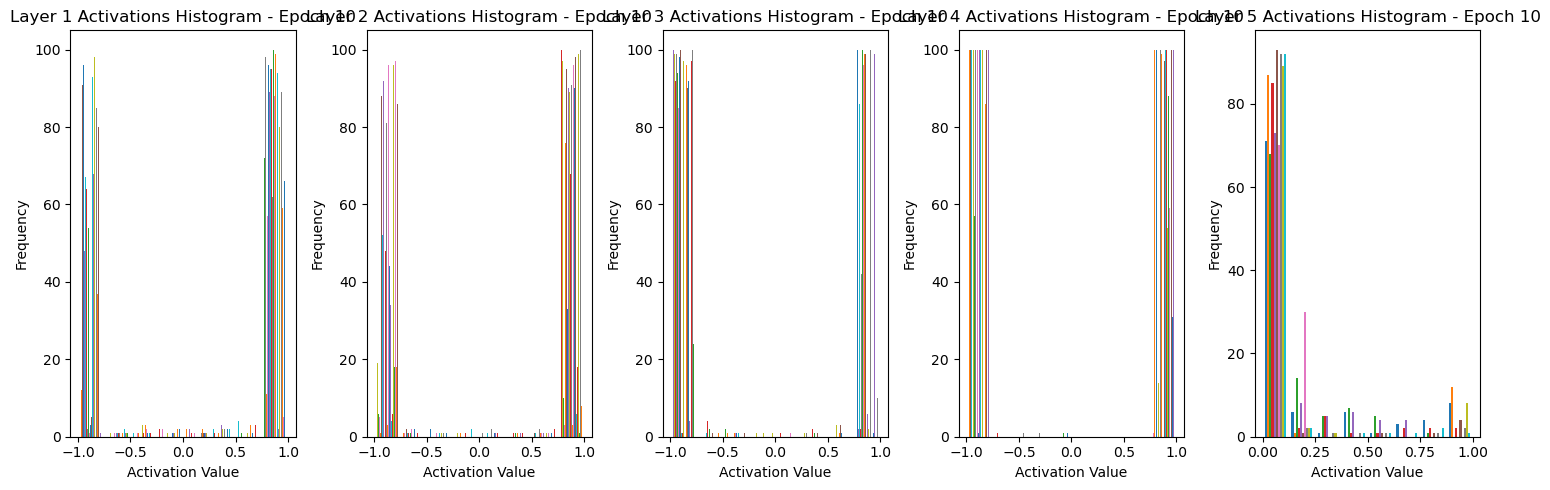

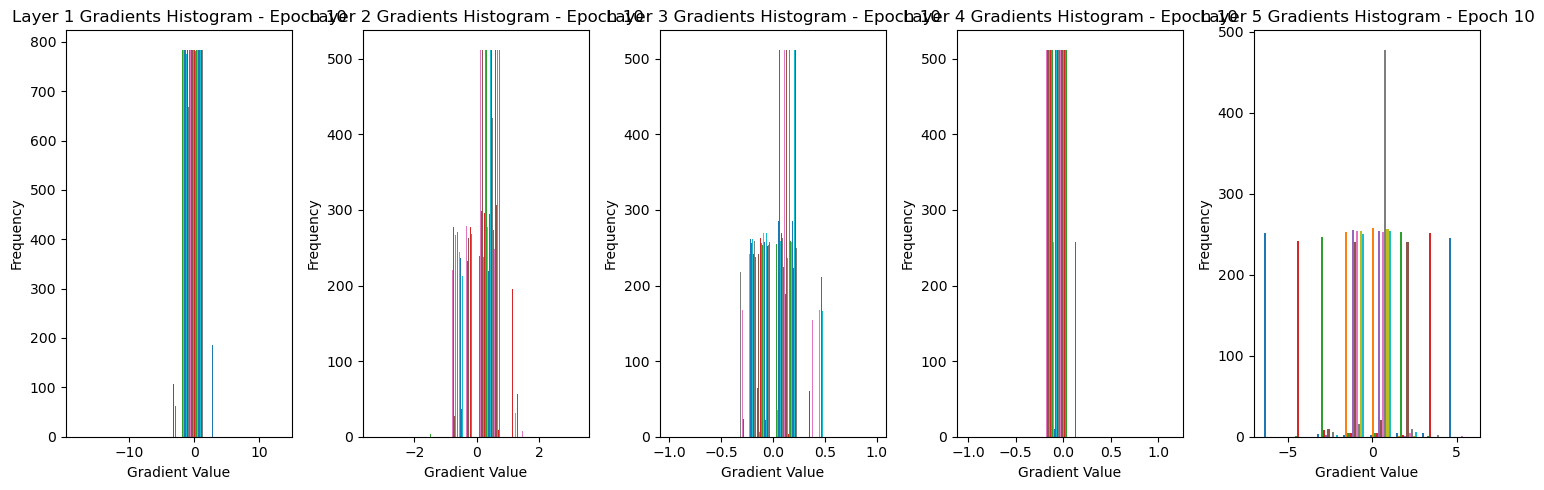

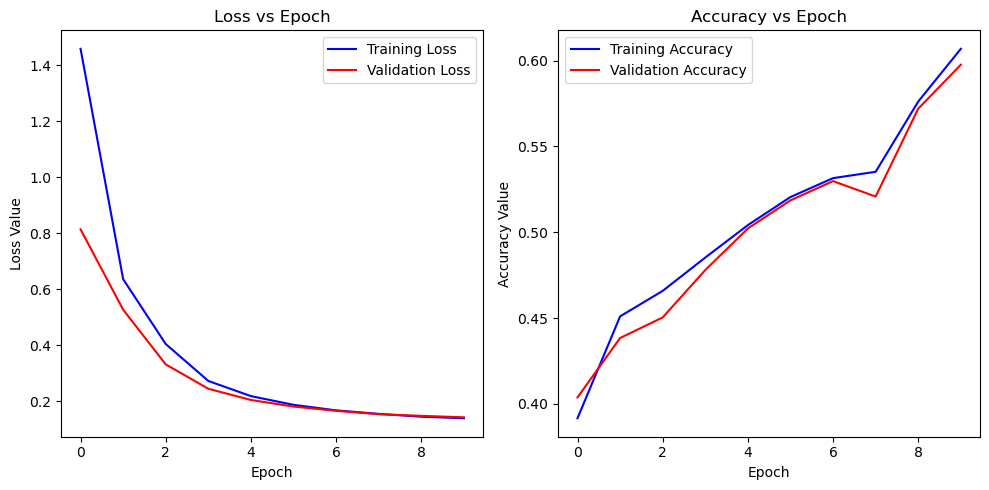

In [23]:
from nnlib.initialization_functions.normal import Normal
from nnlib.activation_functions.tanh import Tanh

model = SequentialModel()


model.add(Dense(n_units= 512, input_dim=784, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units = 10, input_dim = 512, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.001),
              loss=BinaryCrossEntropy(),
              initializer=Normal(mean = 0, std =1))

model.fit(X_train, y_train_onehot, epochs=10, batch_size=100, X_val=X_test, y_val=y_test, verbose=True)
